#DATASETS

In [ ]:
import pandas as pd

# Read the CSV files into Pandas DataFrames
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# Display the first few rows of each DataFrame to verify the data has been loaded successfully
print("Train Data:")
print(train.head())

print("\nTest Data:")
print(test.head())

Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

In [ ]:
print("\nShapes:")
print("Train Data Shape:", train.shape)
print("Test Data Shape:", test.shape)


Shapes:
Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


In [ ]:
y = train["SalePrice"]
#train = train.drop('SalePrice', axis=1)
print(y.shape)
print(train.shape)

(1460,)
(1460, 81)


#EDA

In [ ]:
print(train.describe())
numeric_summary = train.describe()

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [ ]:
import numpy as np

In [ ]:
numeric_columns = train.select_dtypes(include=[np.number]).columns
categorical_columns = train.select_dtypes(include=['object']).columns

print("Number of Numeric columns:", len(numeric_columns))
print("Number of Categorical columns:", len(categorical_columns))

Number of Numeric columns: 38
Number of Categorical columns: 43


In [ ]:
print(train.describe(include='object'))
categorical_summary = train.describe(include='object')

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

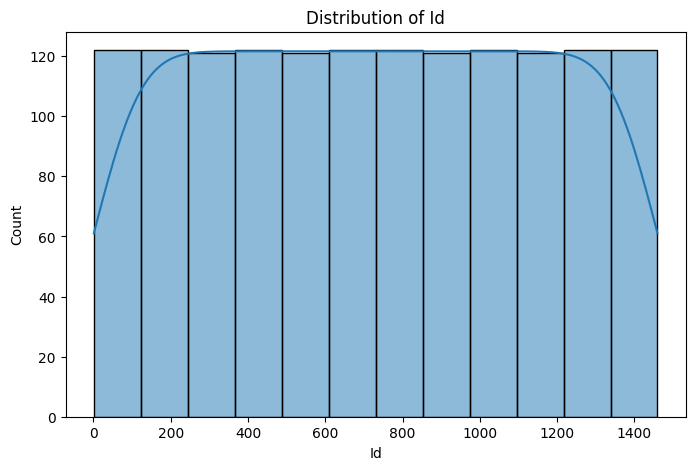

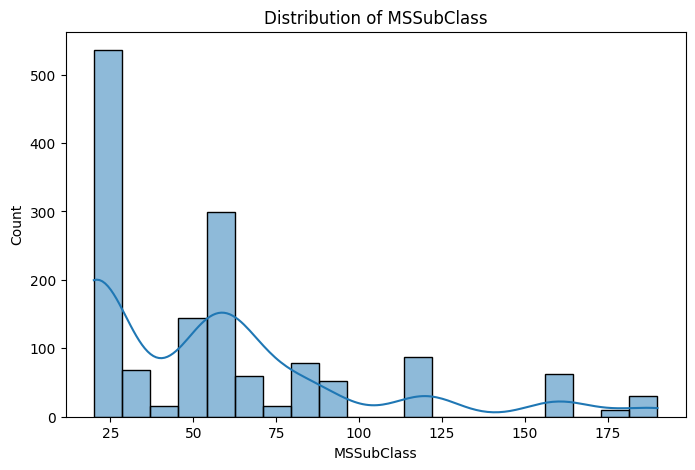

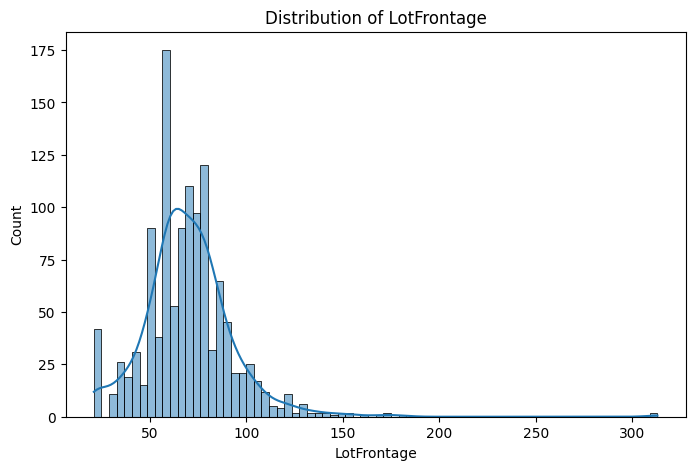

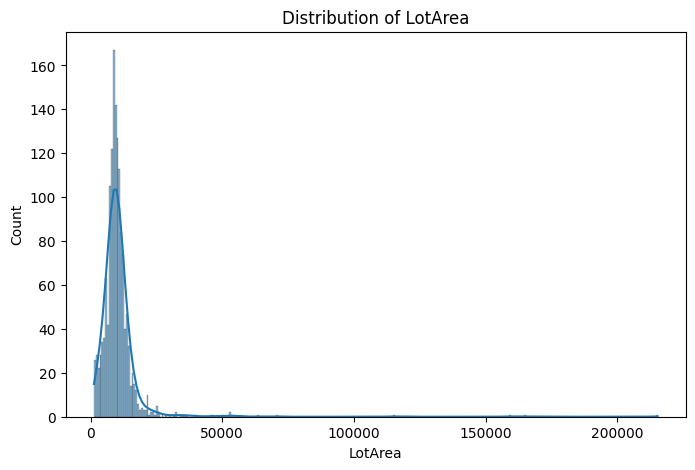

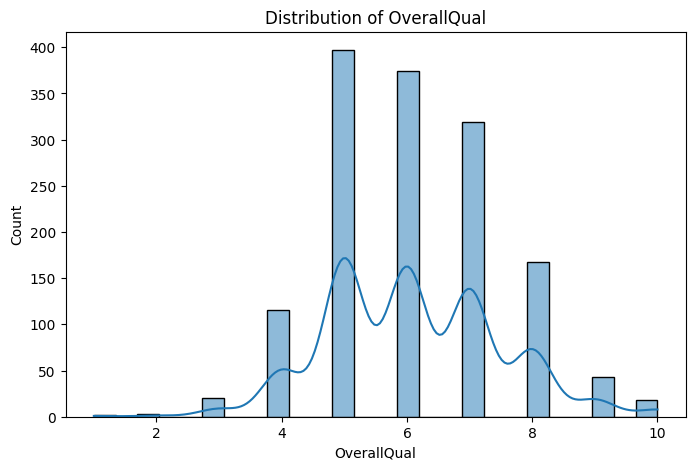

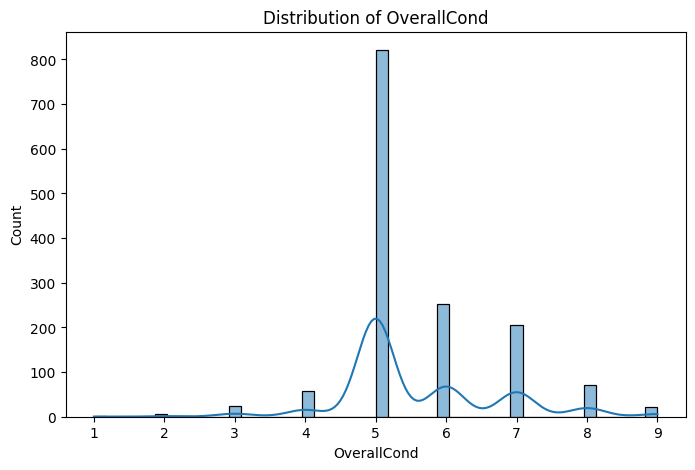

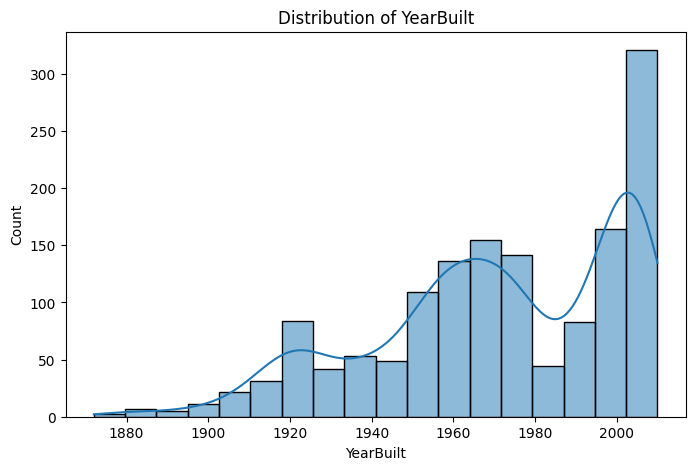

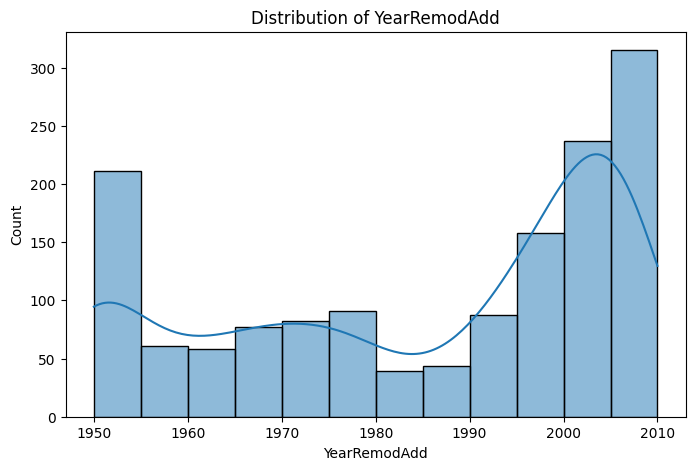

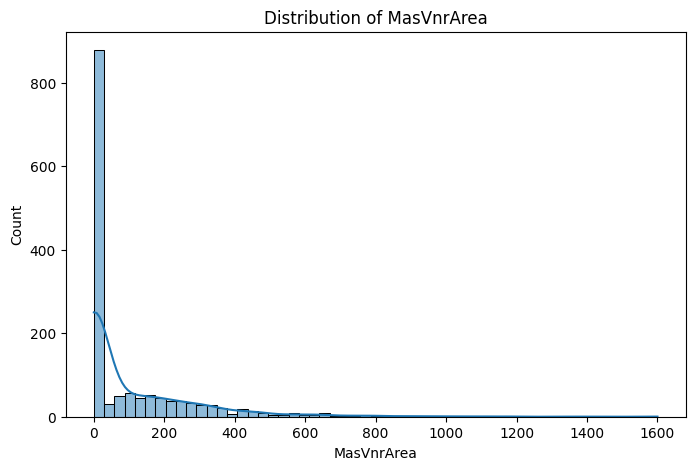

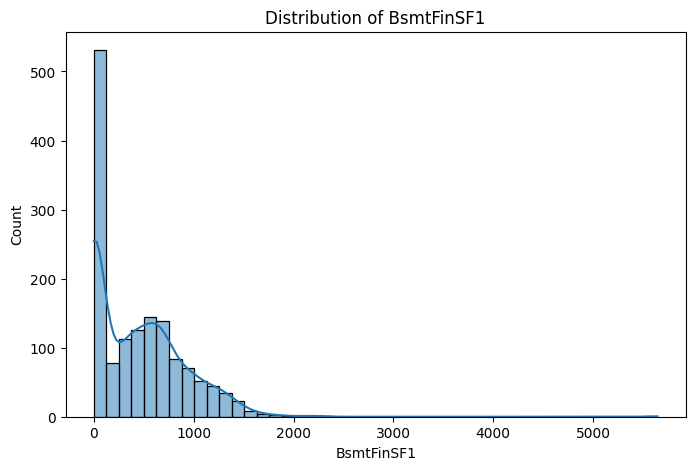

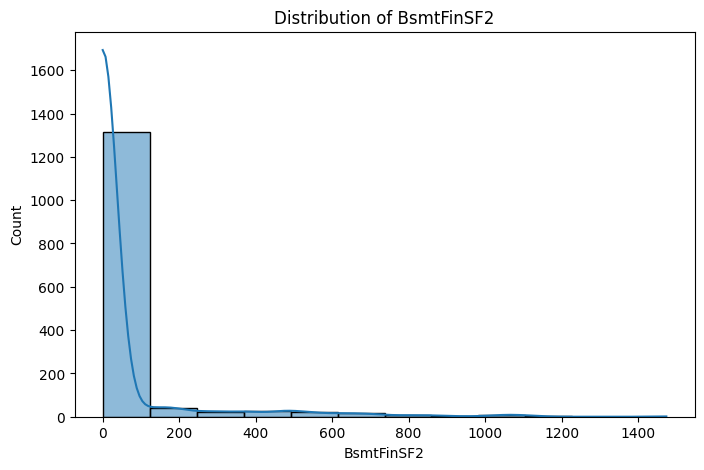

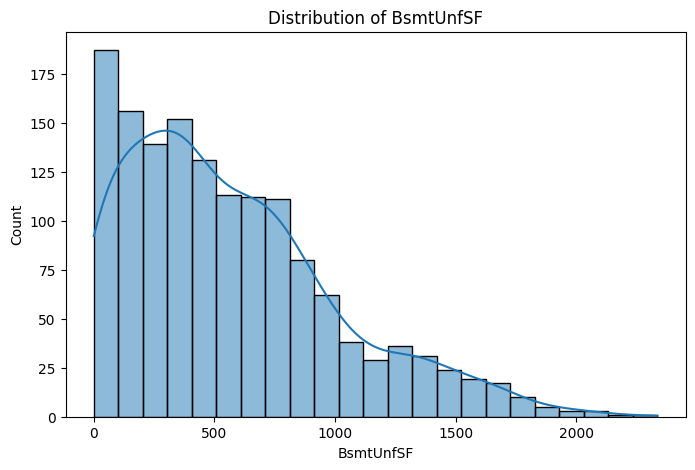

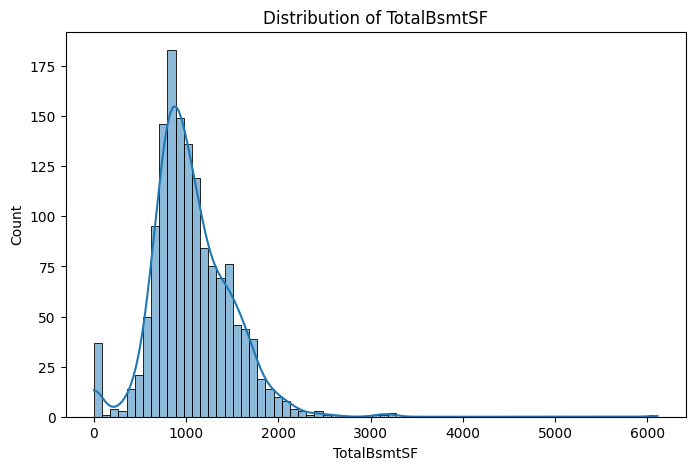

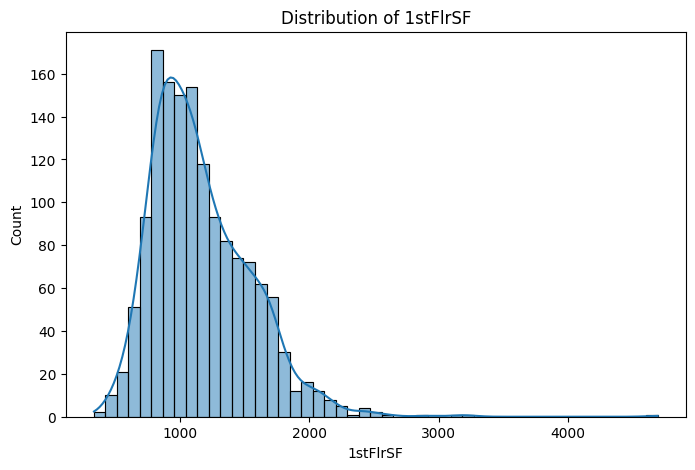

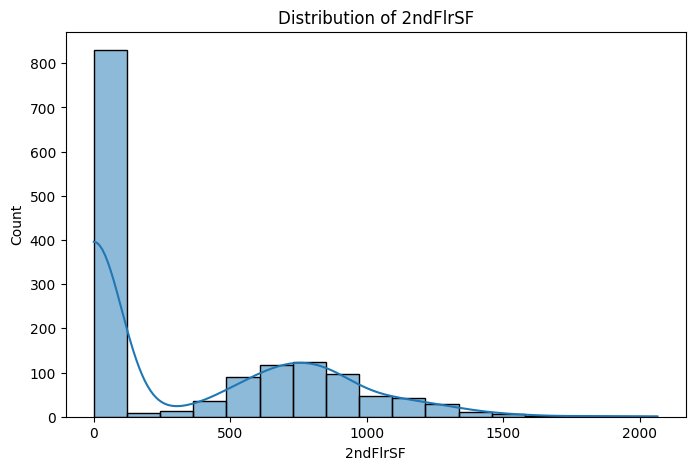

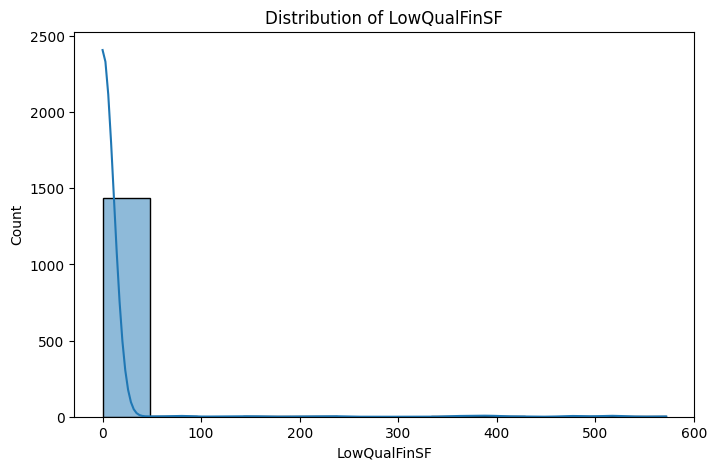

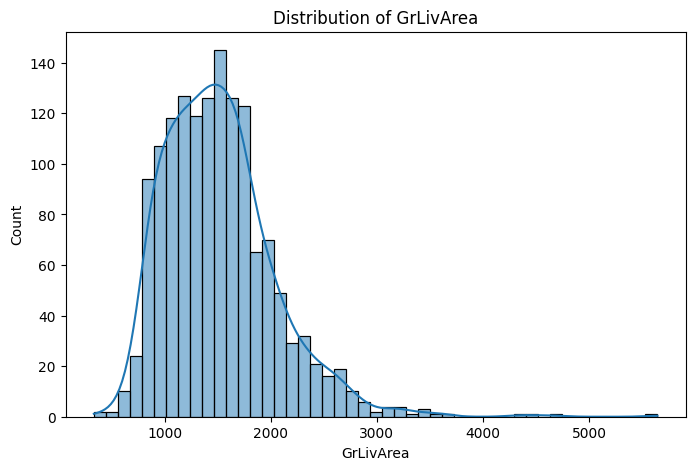

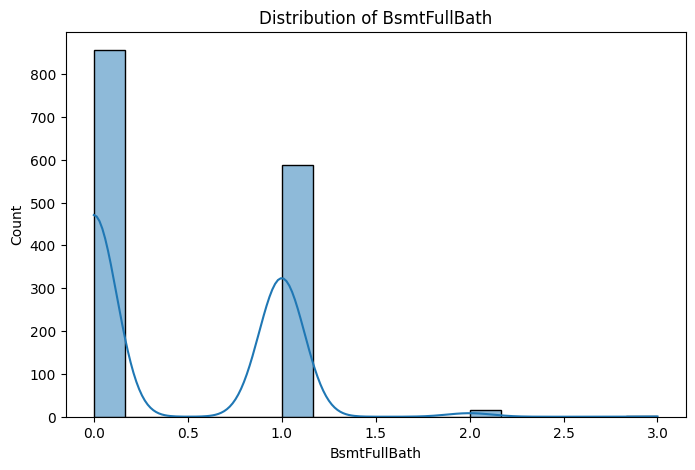

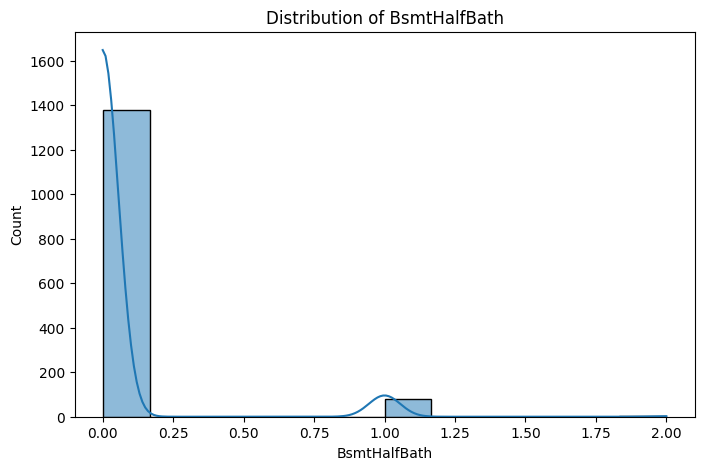

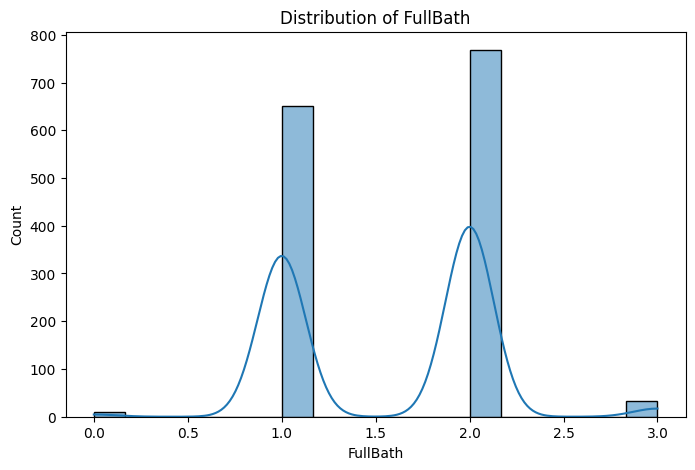

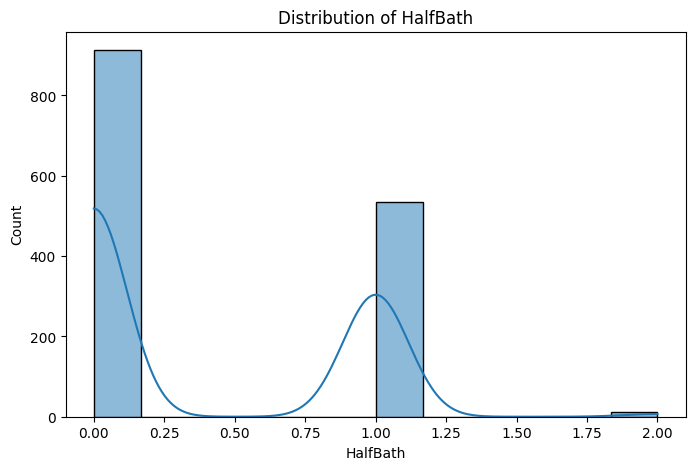

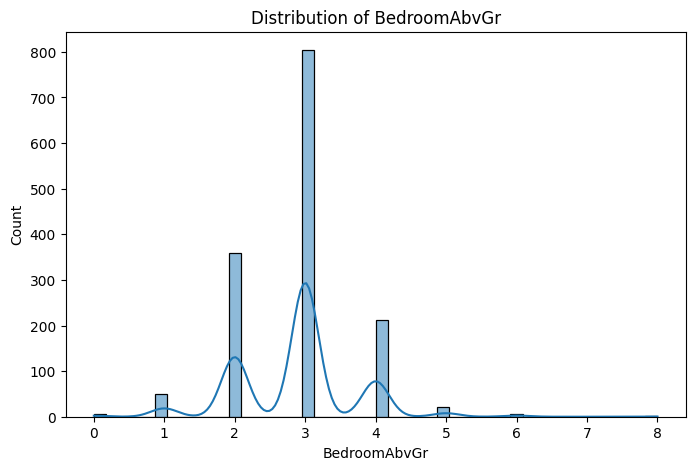

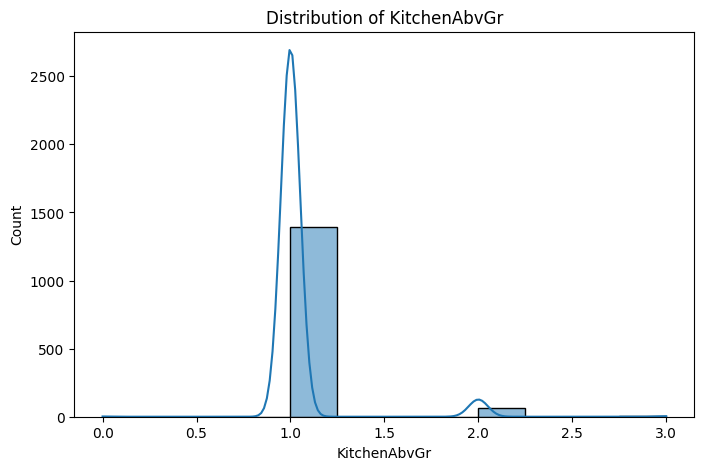

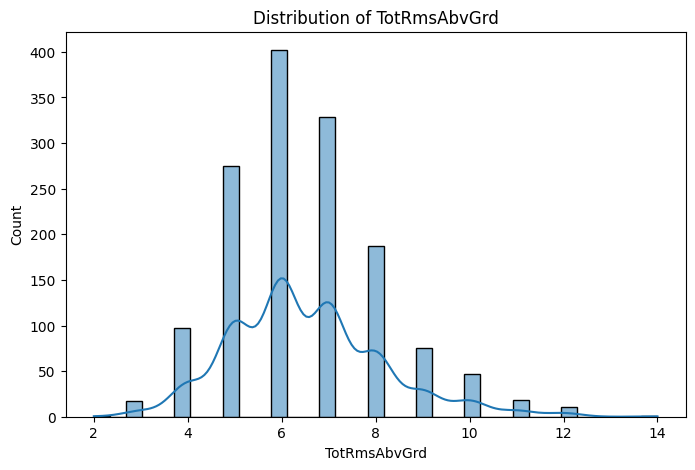

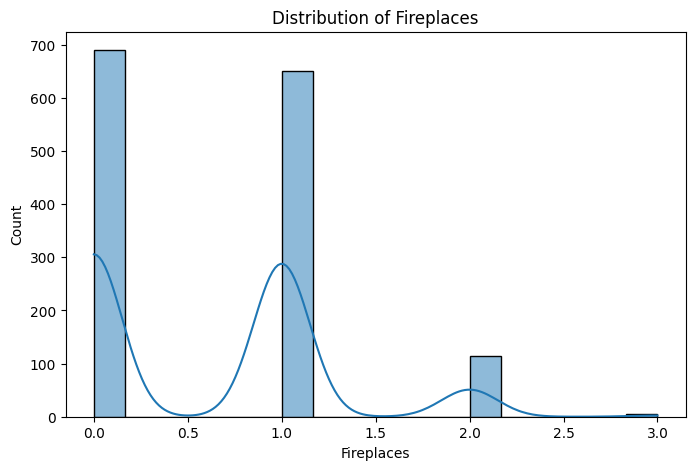

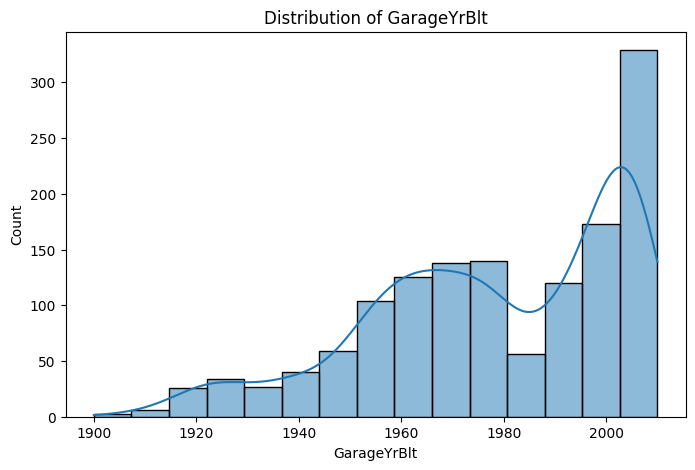

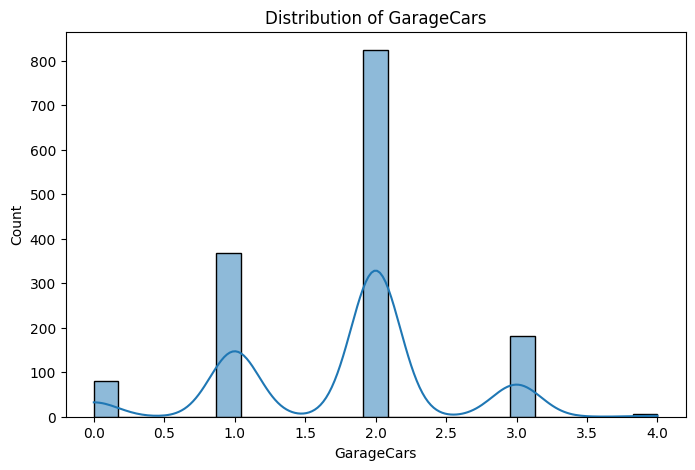

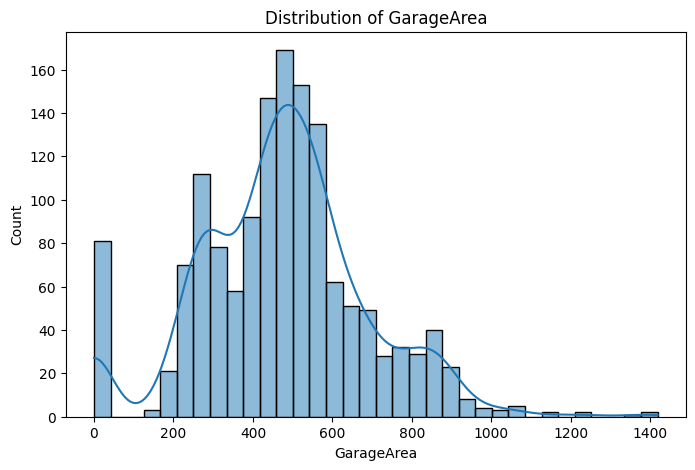

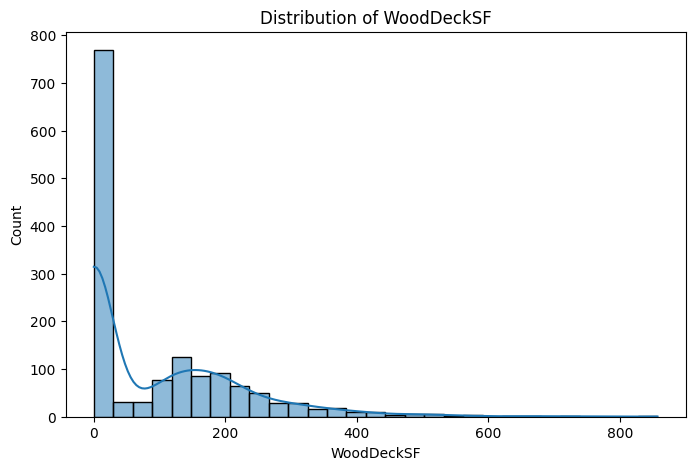

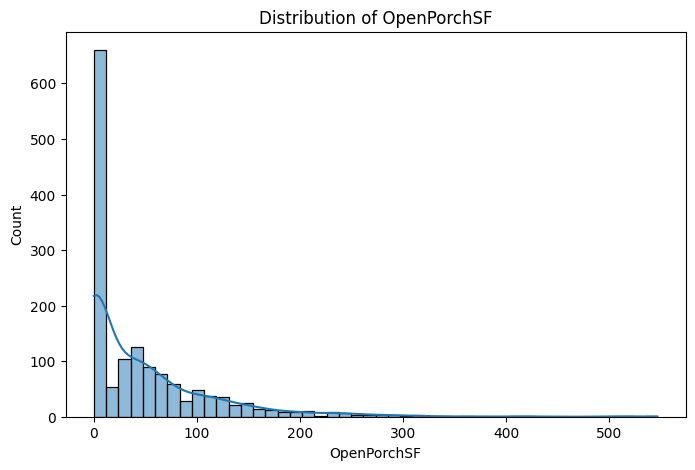

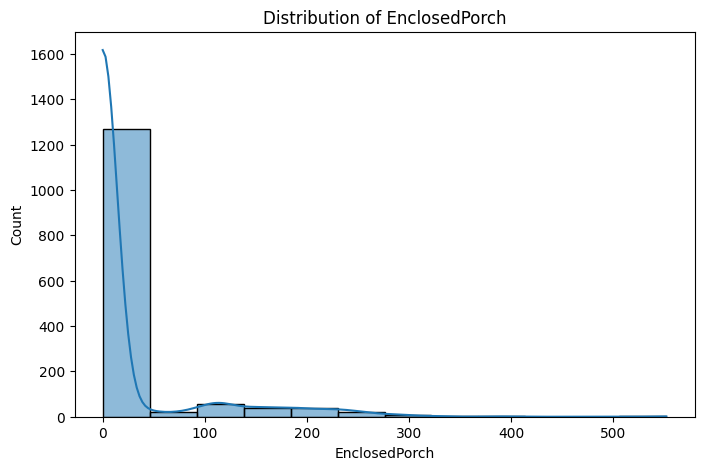

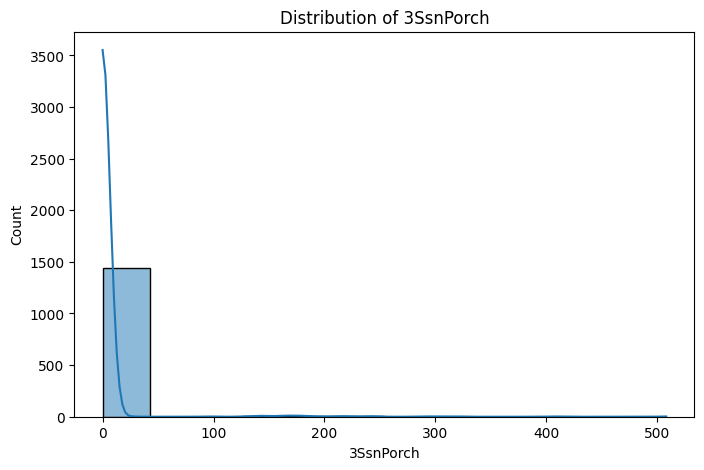

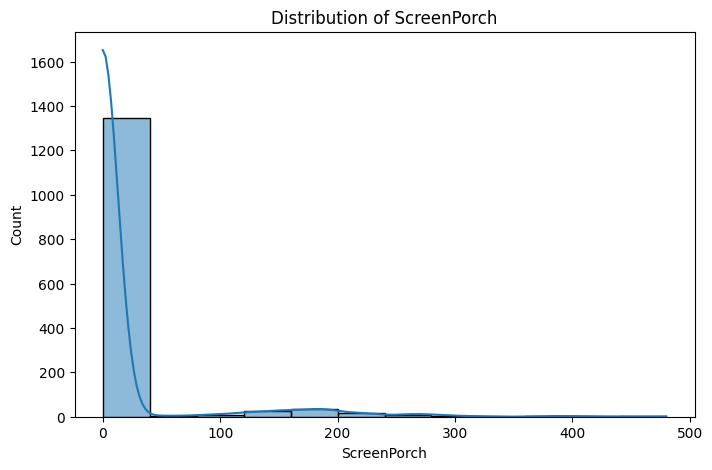

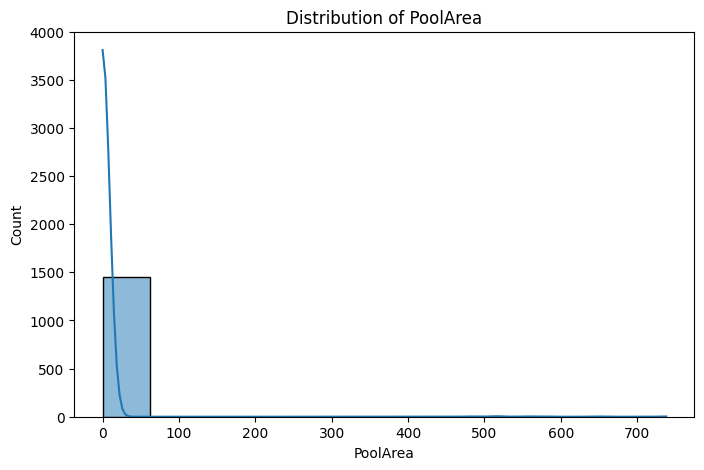

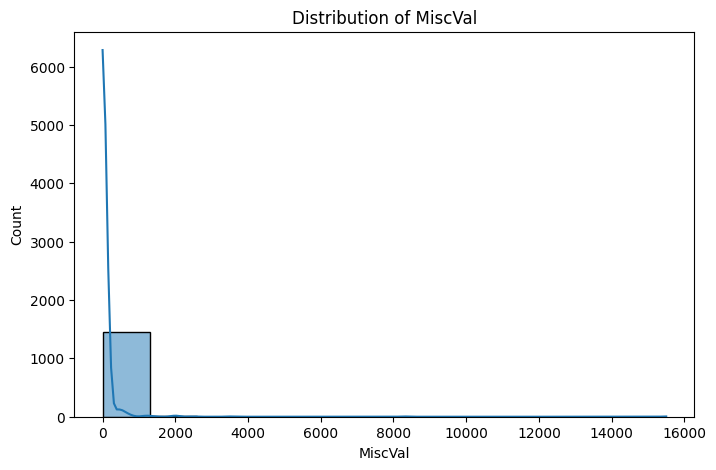

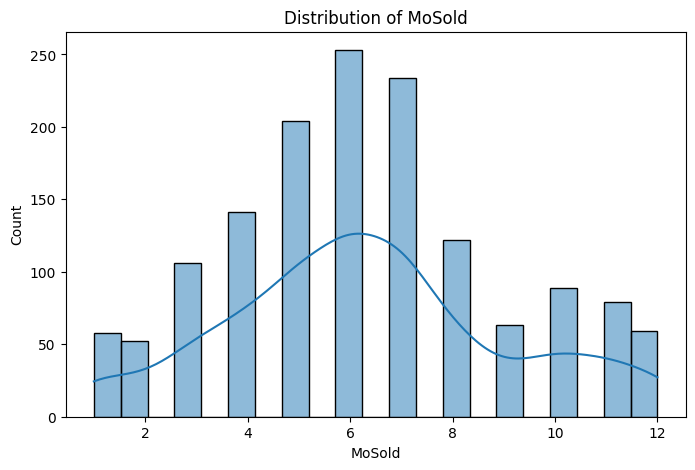

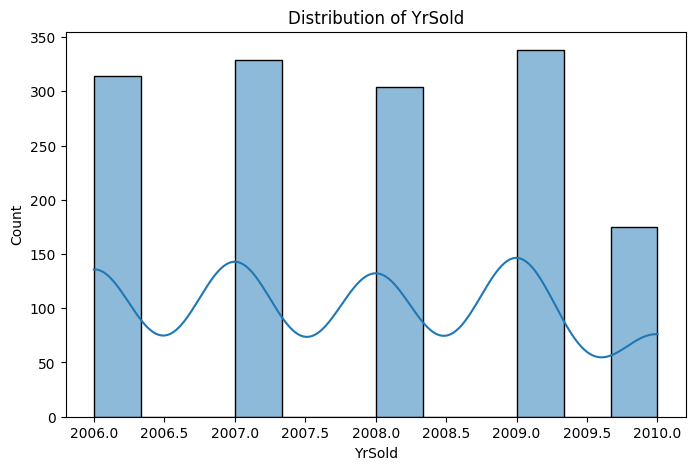

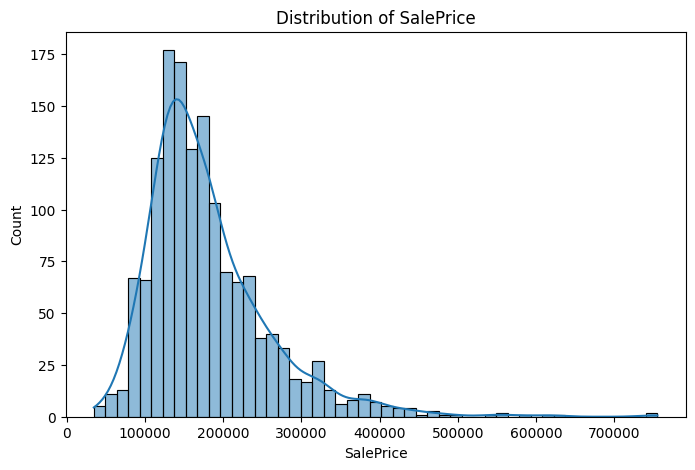

In [ ]:
for column in numeric_summary.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

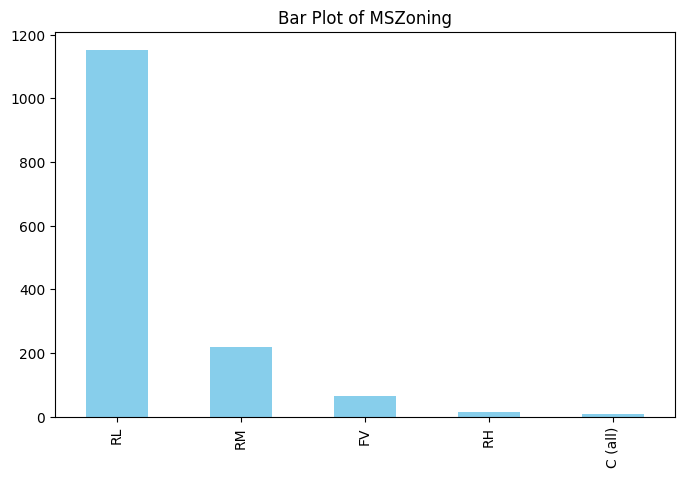

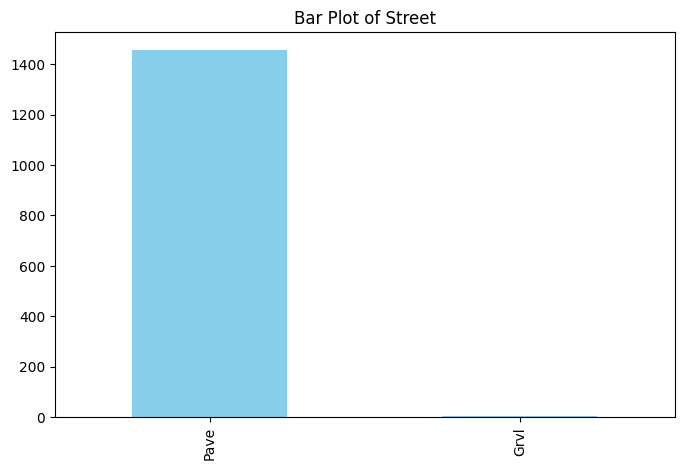

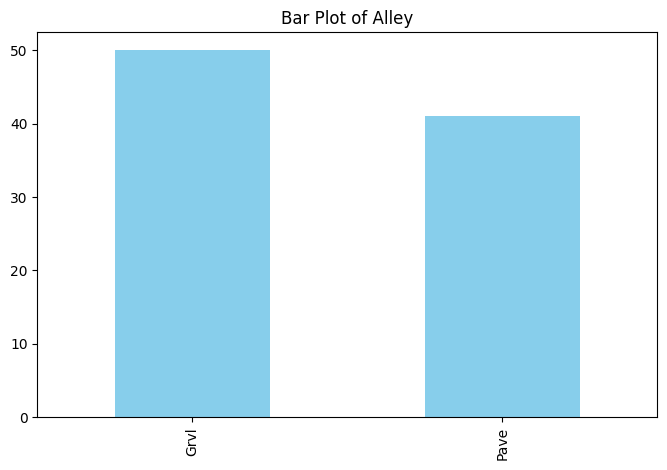

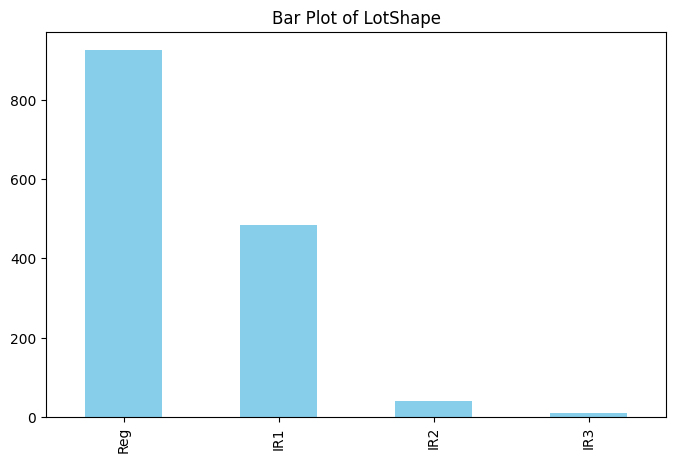

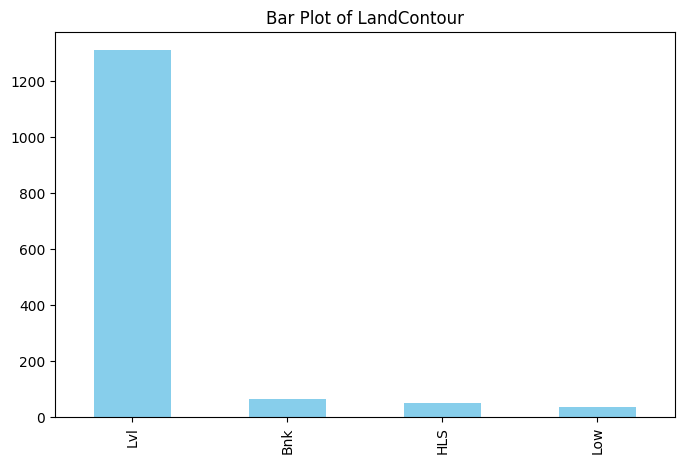

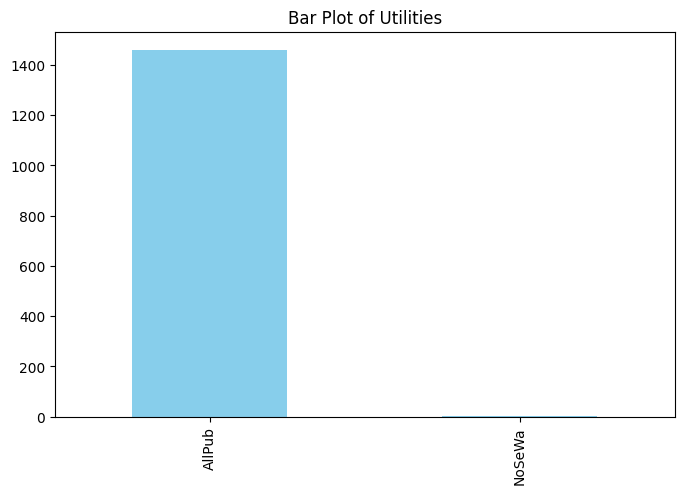

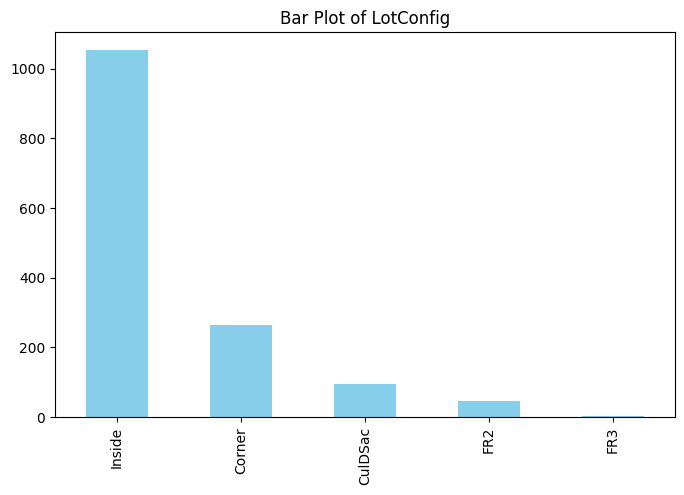

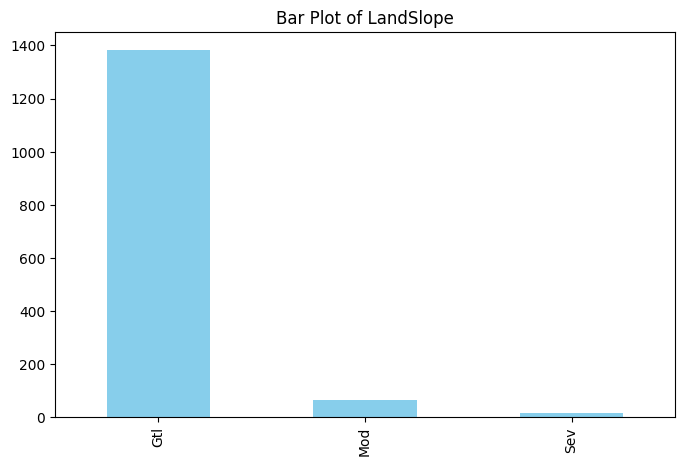

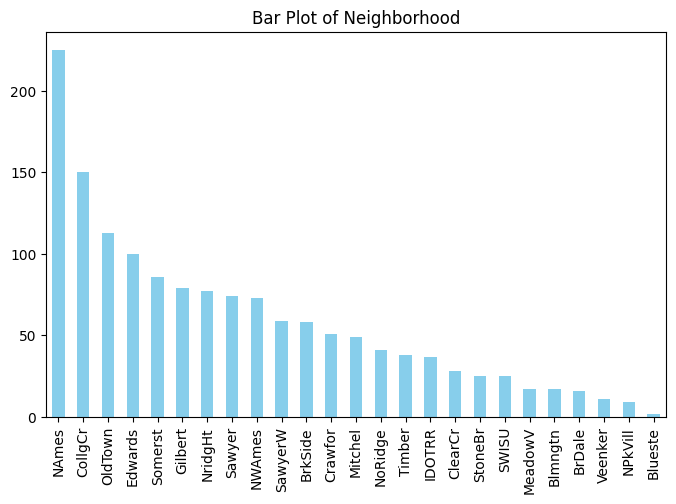

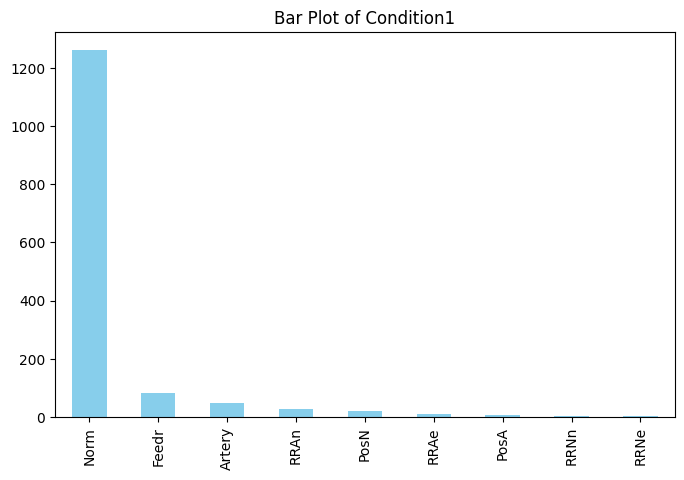

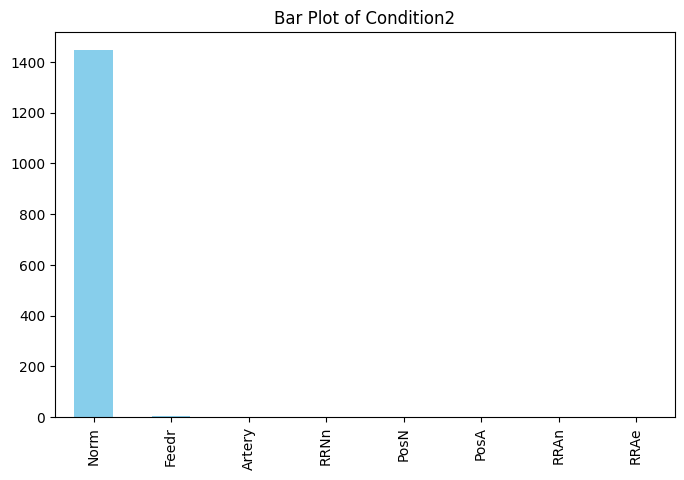

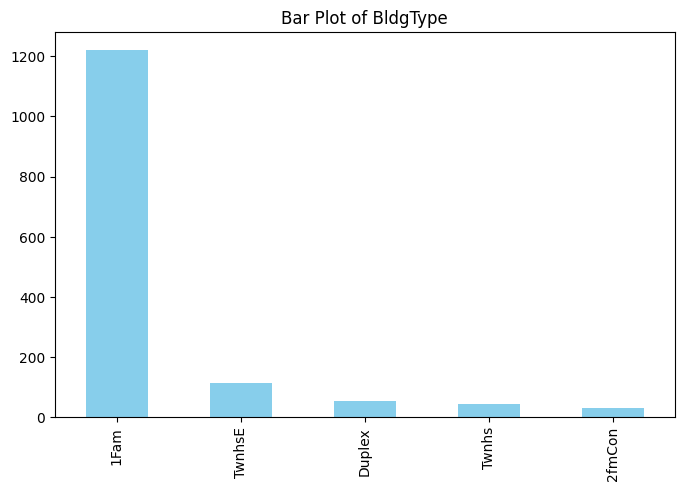

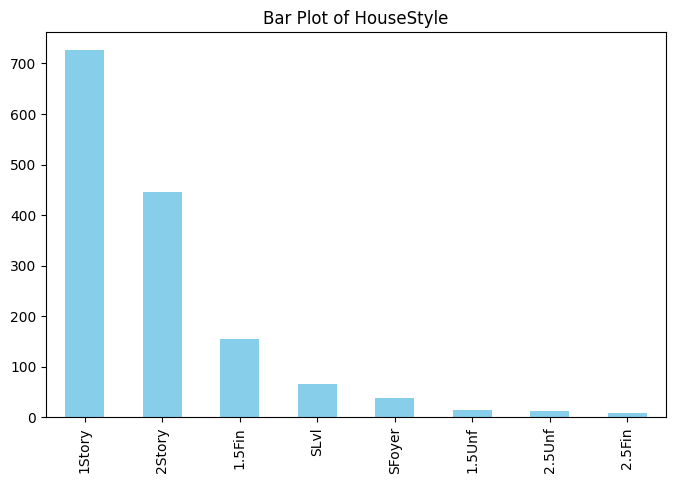

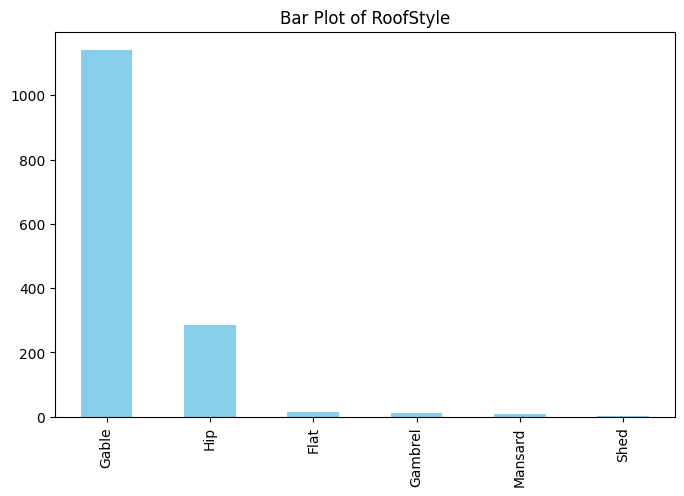

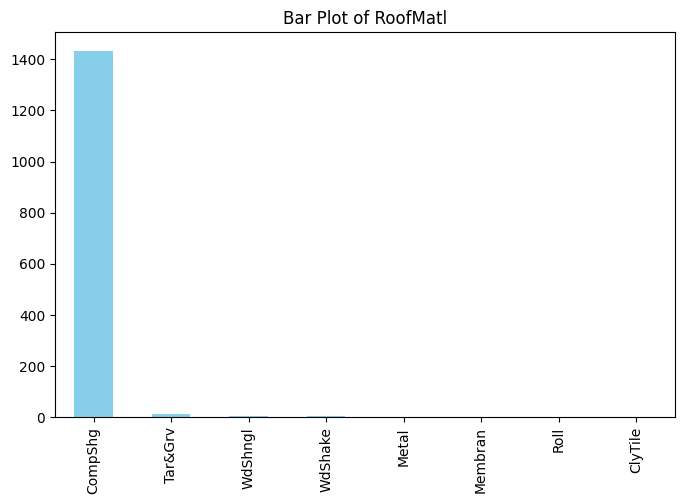

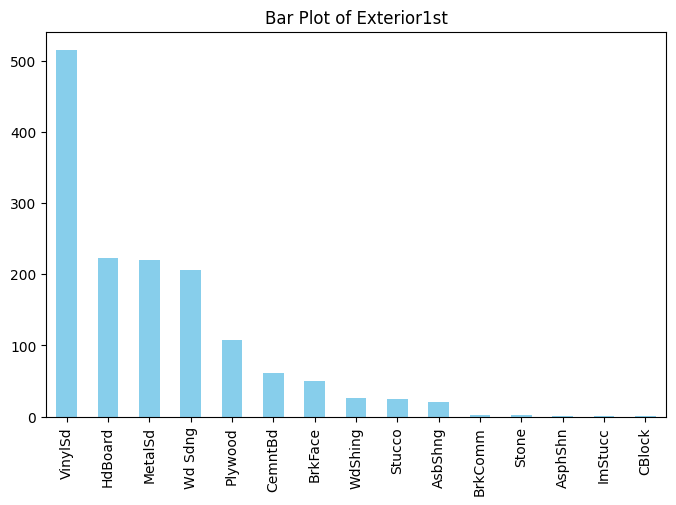

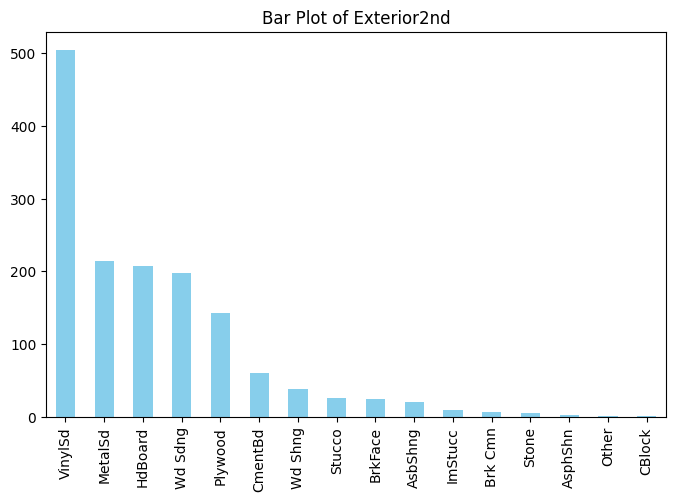

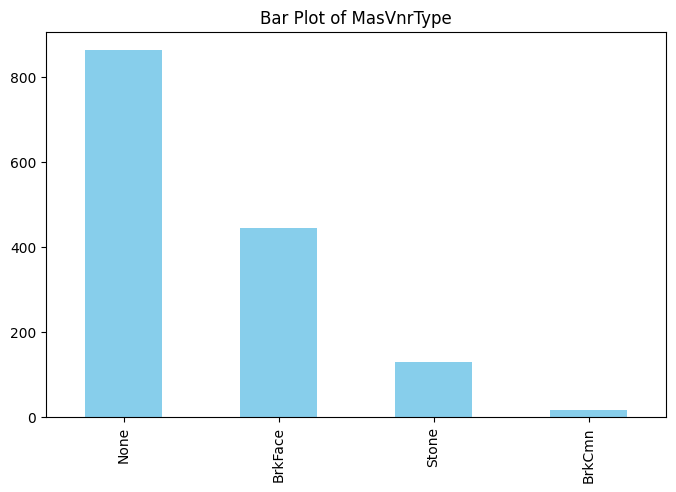

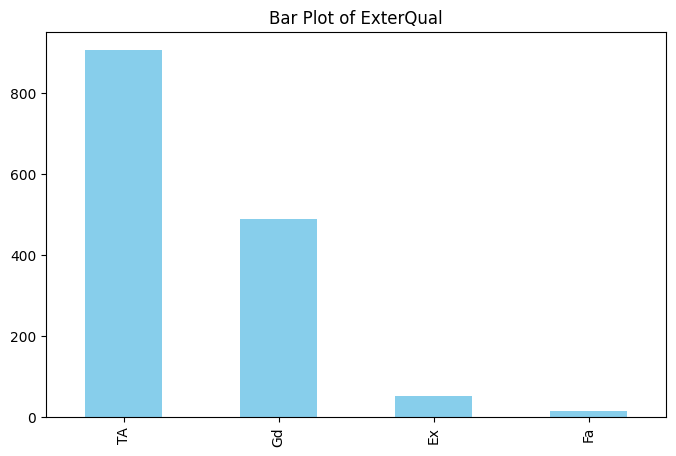

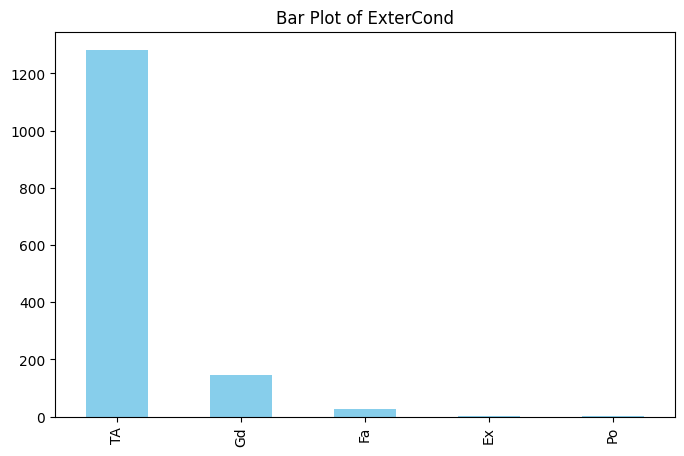

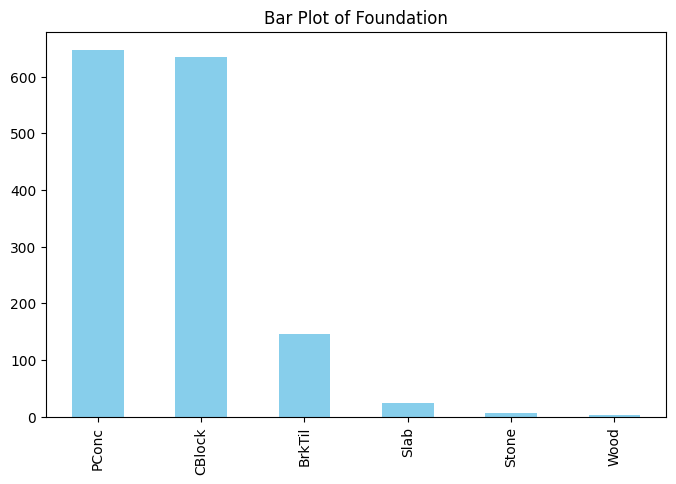

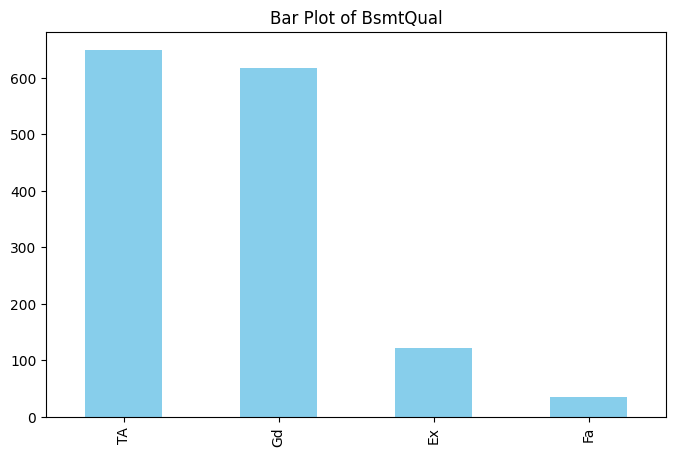

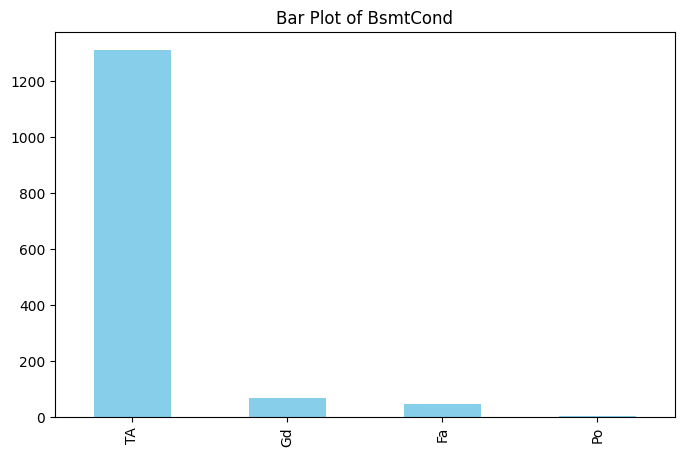

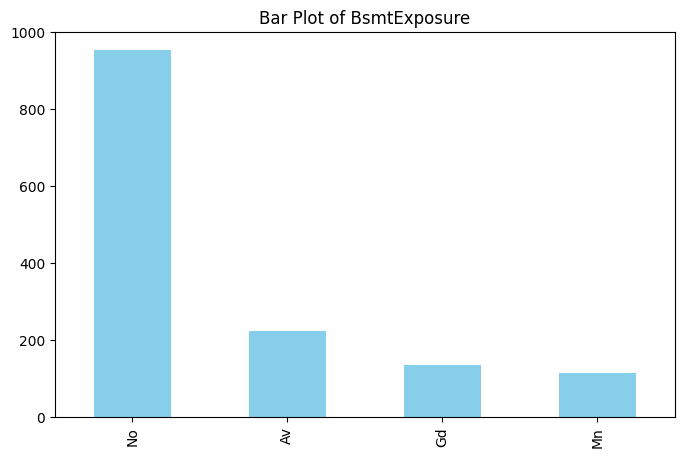

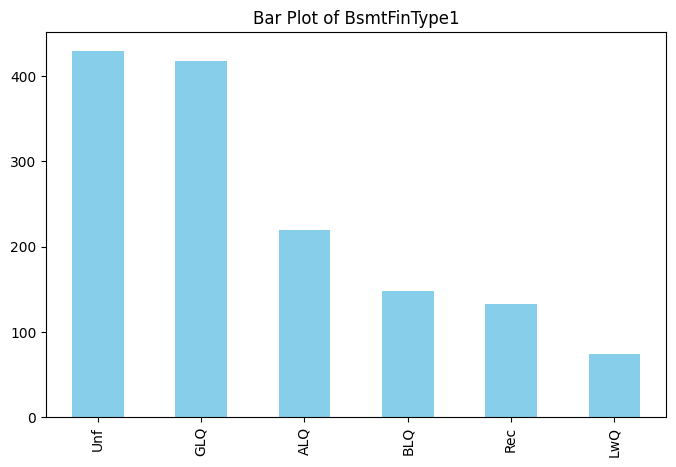

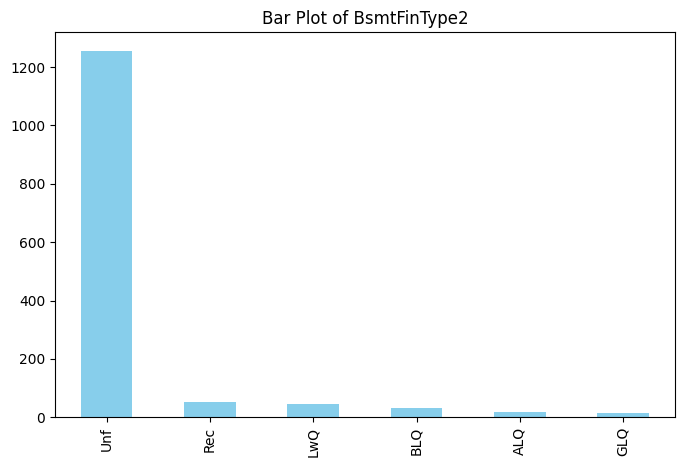

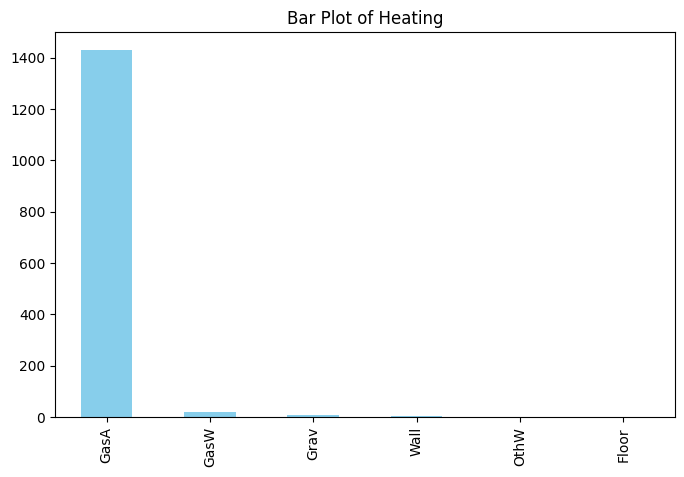

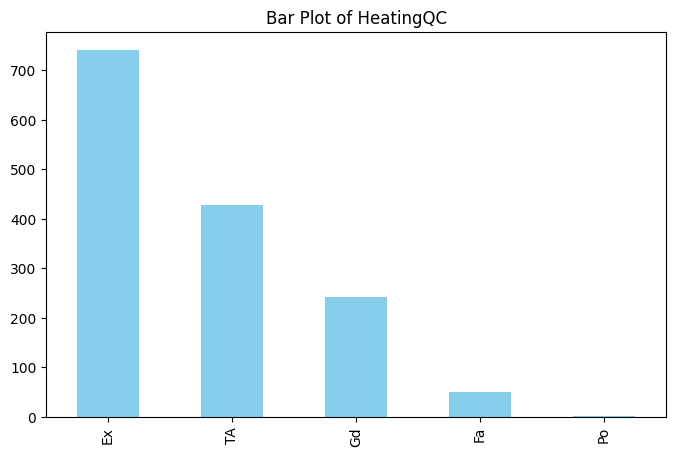

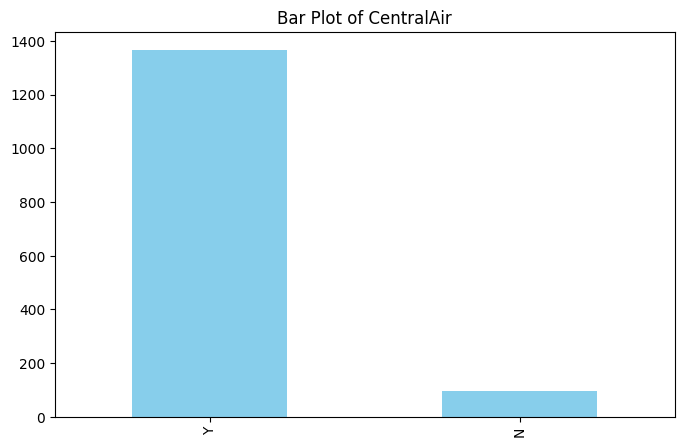

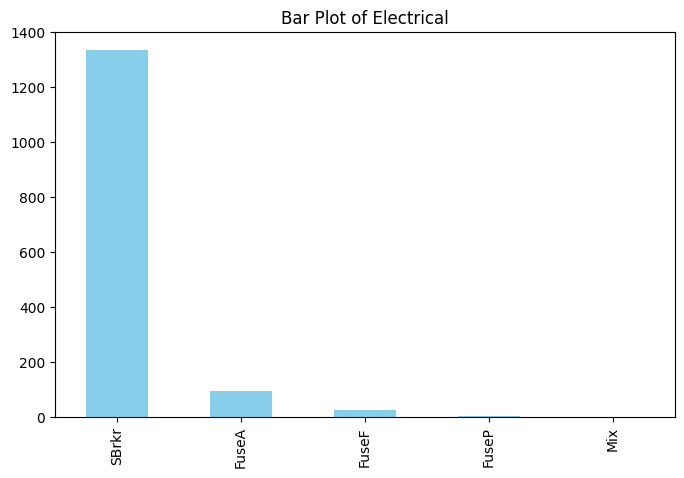

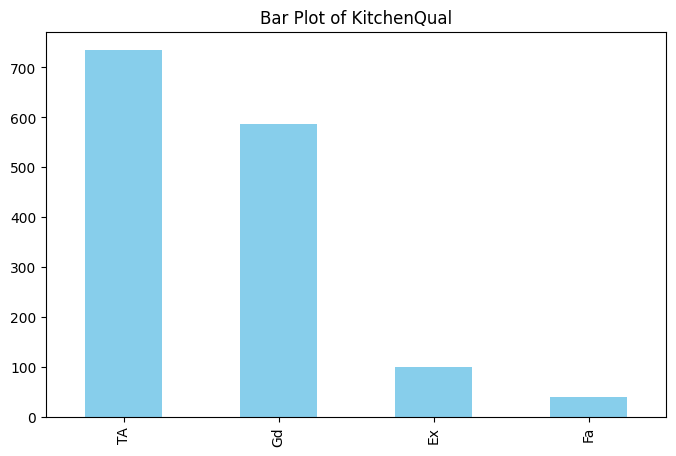

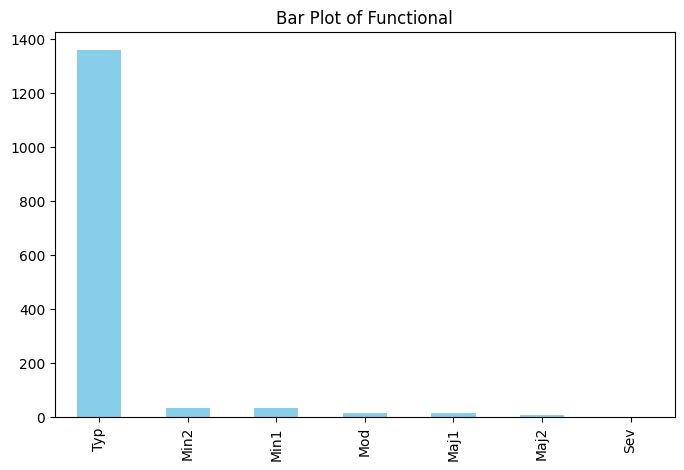

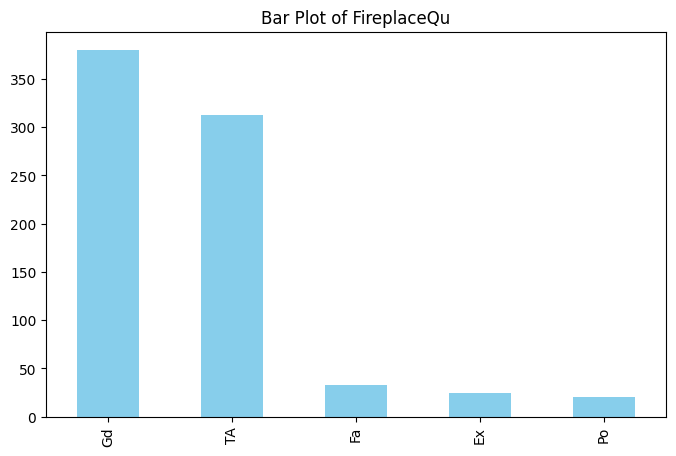

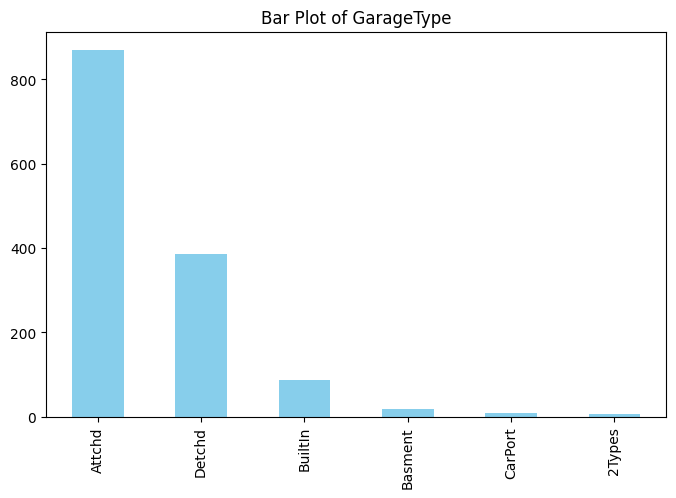

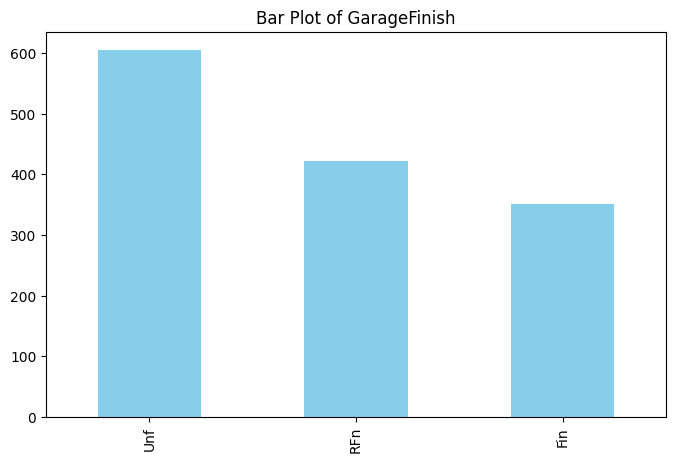

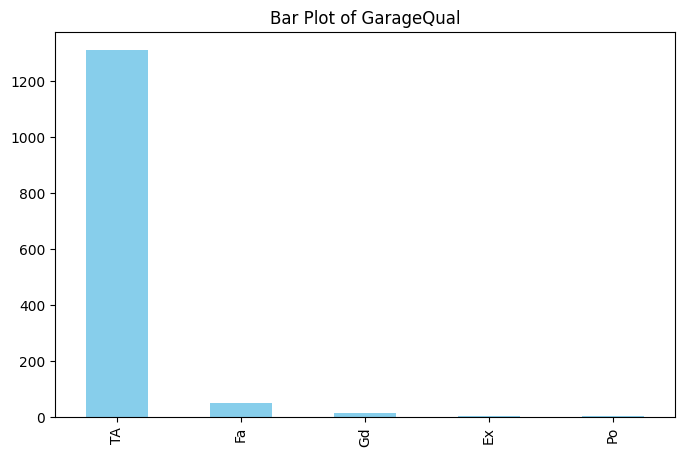

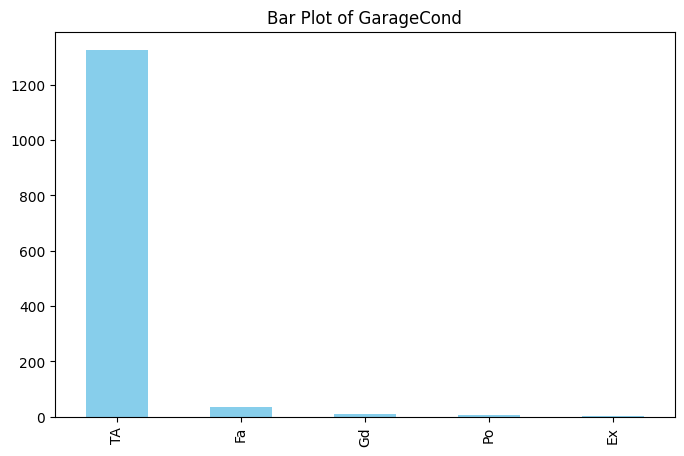

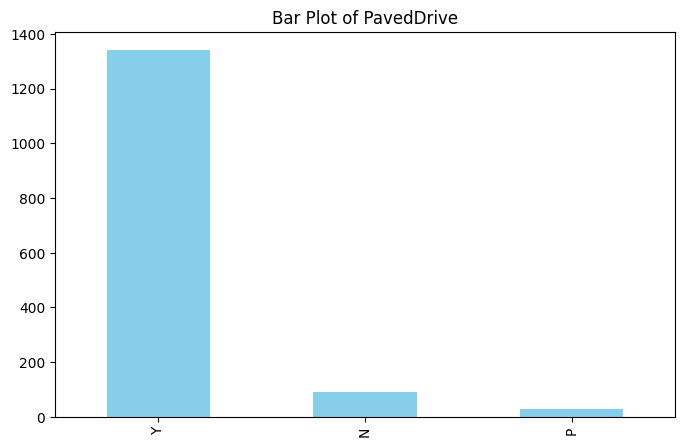

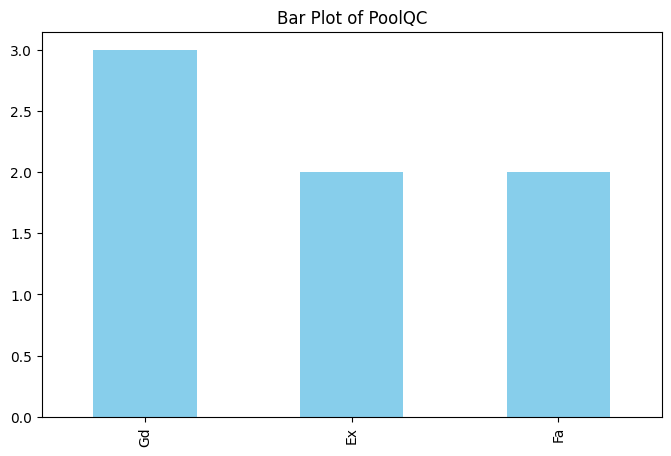

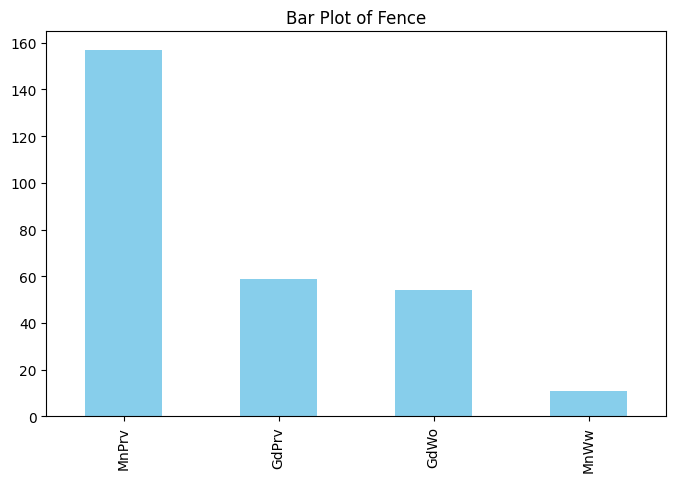

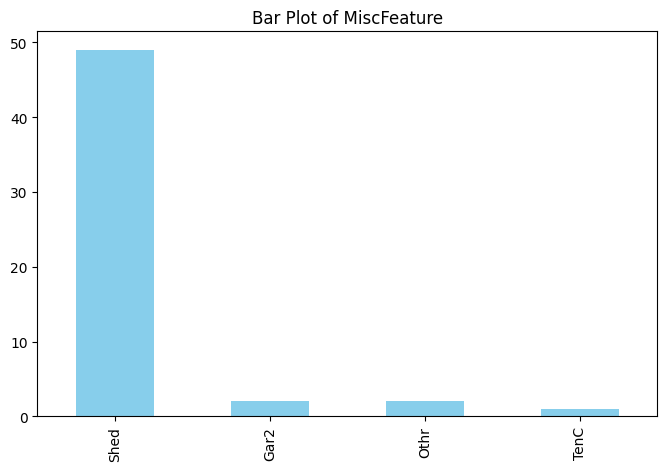

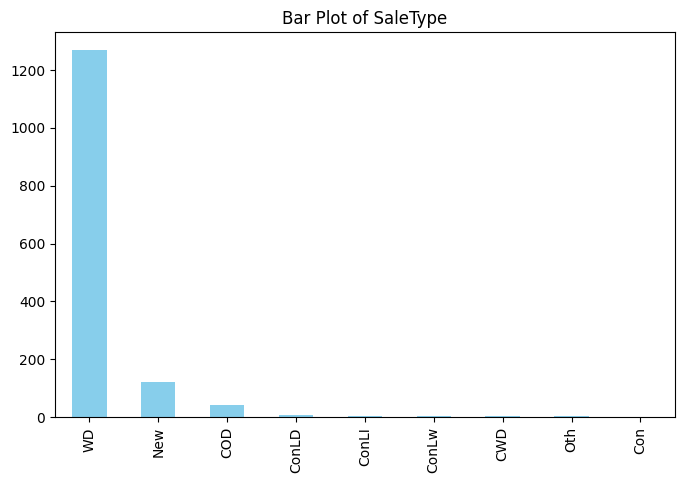

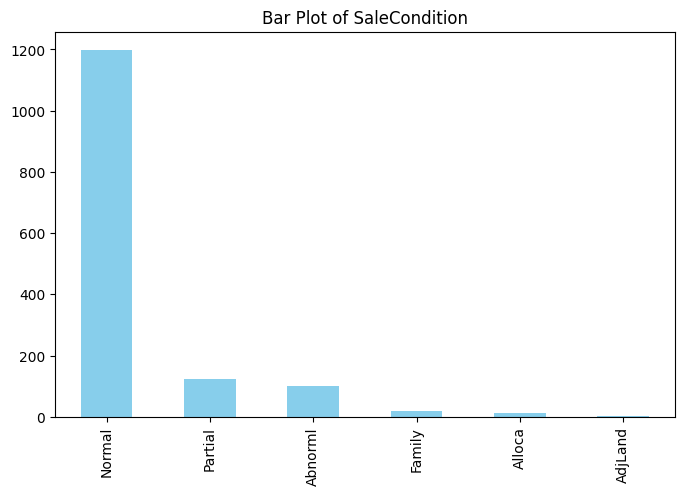

In [ ]:
for column in categorical_summary.columns:
    plt.figure(figsize=(8, 5))
    train[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {column}')
    plt.show()

In [ ]:
print("\nMissing Values:")
print(train.isnull().sum())
print("\n Total Missing Values:")
print(train.isnull().sum().sum())


Missing Values:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

 Total Missing Values:
6965


In [ ]:
train.columns[train.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
len(train.columns[train.isna().any()].tolist())

19

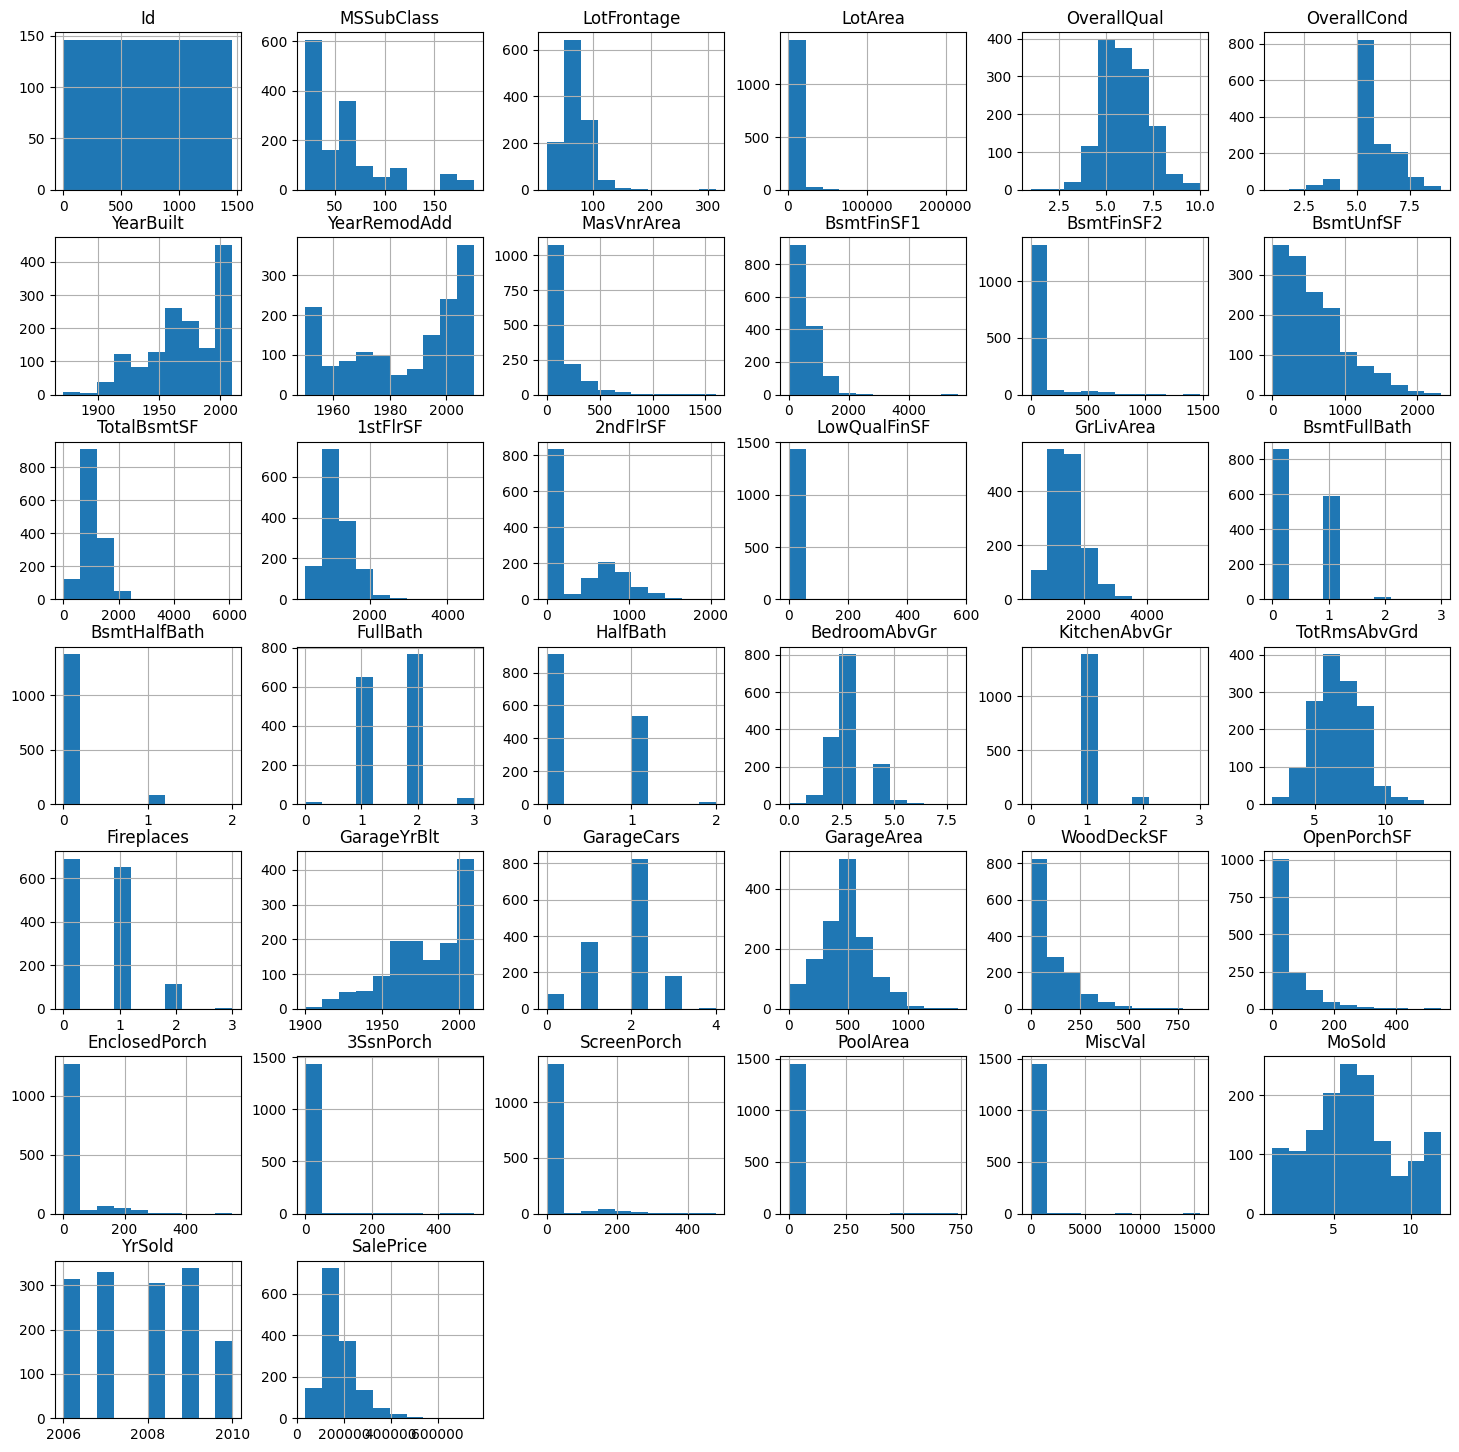

In [ ]:
train.hist(figsize=(18,18))
plt.show()

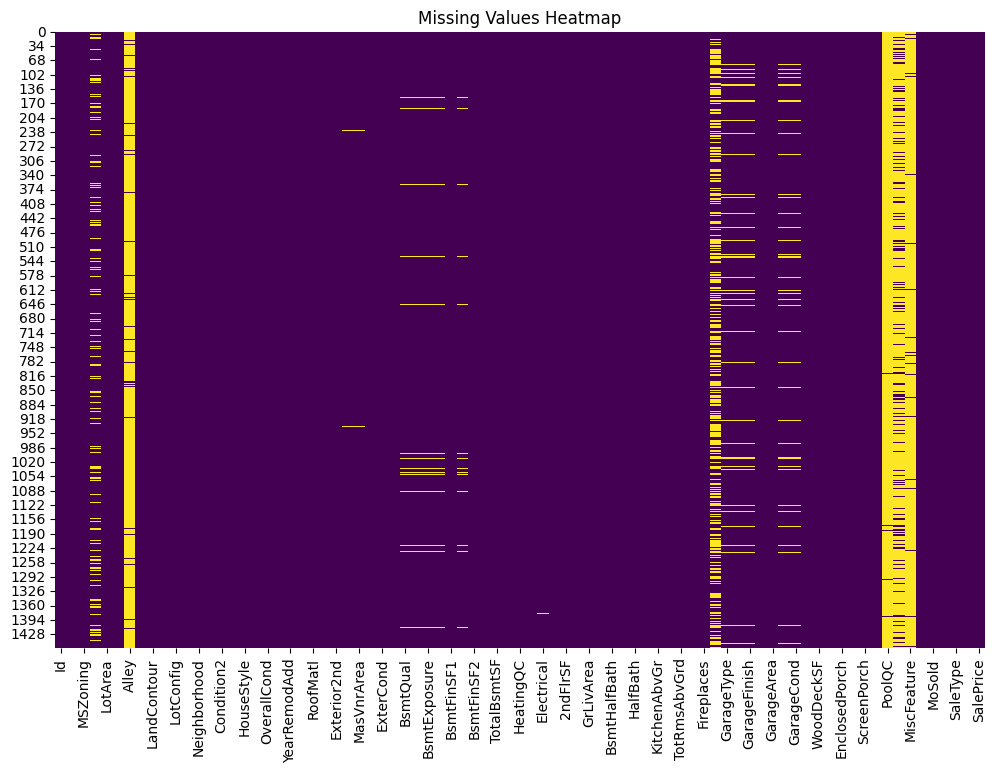

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

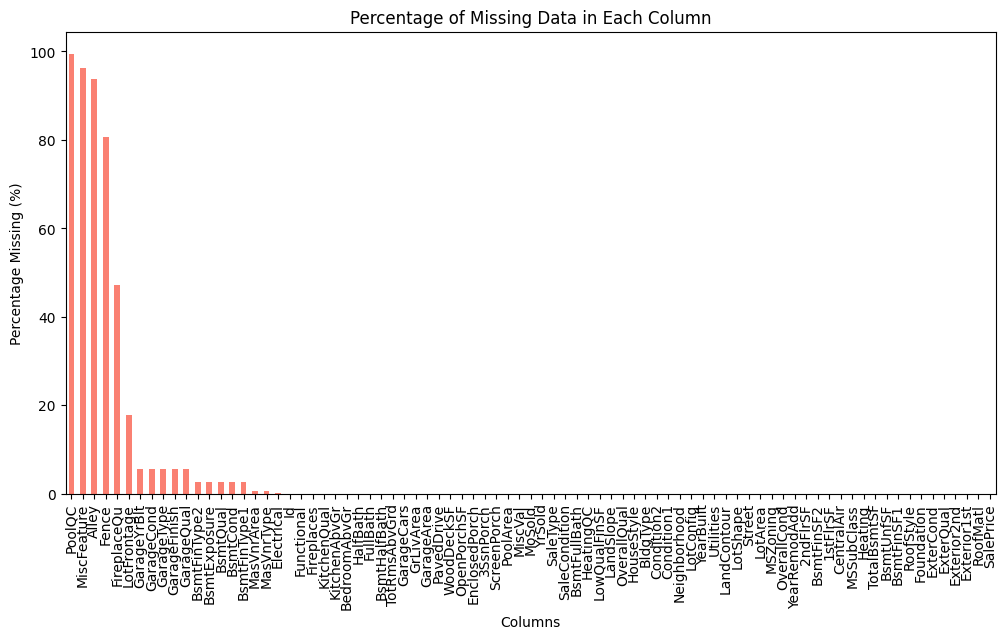

In [ ]:
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Generate a bar plot for missing data percentages
plt.figure(figsize=(12, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Percentage of Missing Data in Each Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing (%)")
plt.show()

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

<Figure size 1200x800 with 0 Axes>

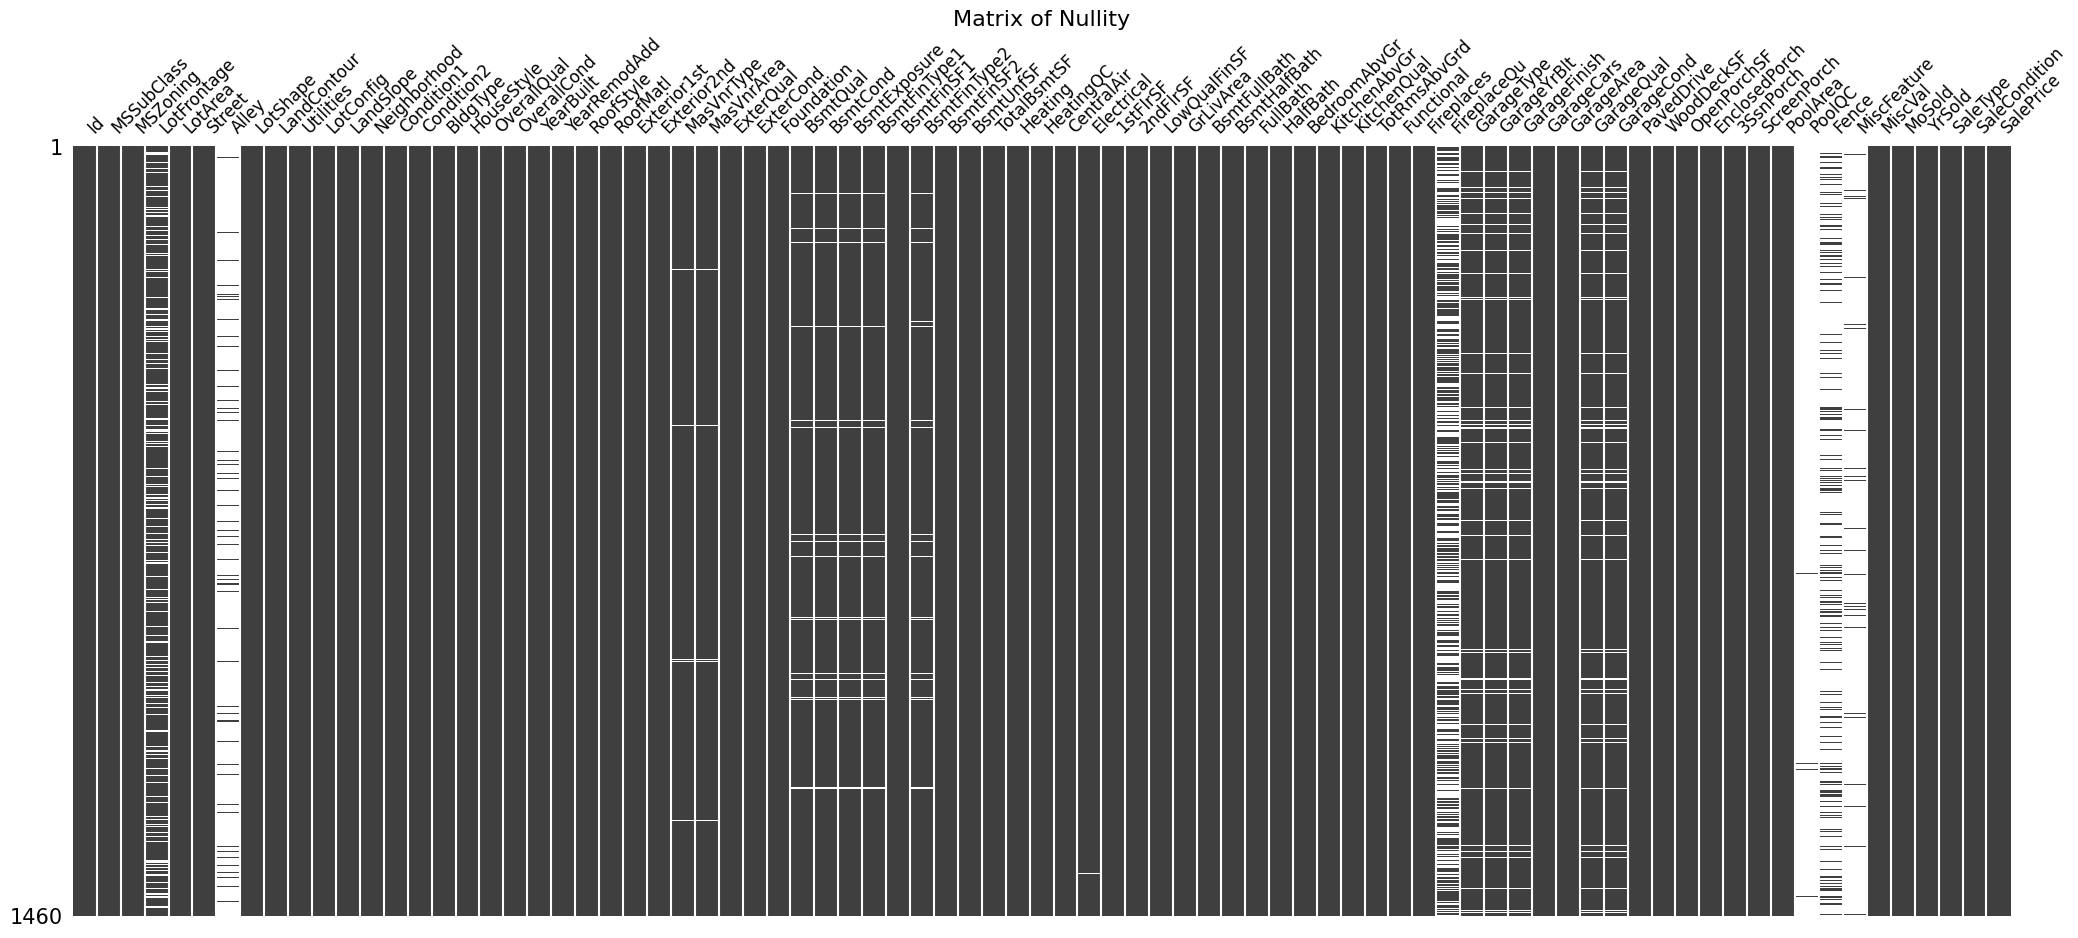

In [ ]:
plt.figure(figsize=(12, 8))
msno.matrix(train, sparkline=False, fontsize=12, labels=True)
plt.title("Matrix of Nullity", fontsize=16)
plt.show()

<ipython-input-23-e096f35c0b1c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr(method='spearman')


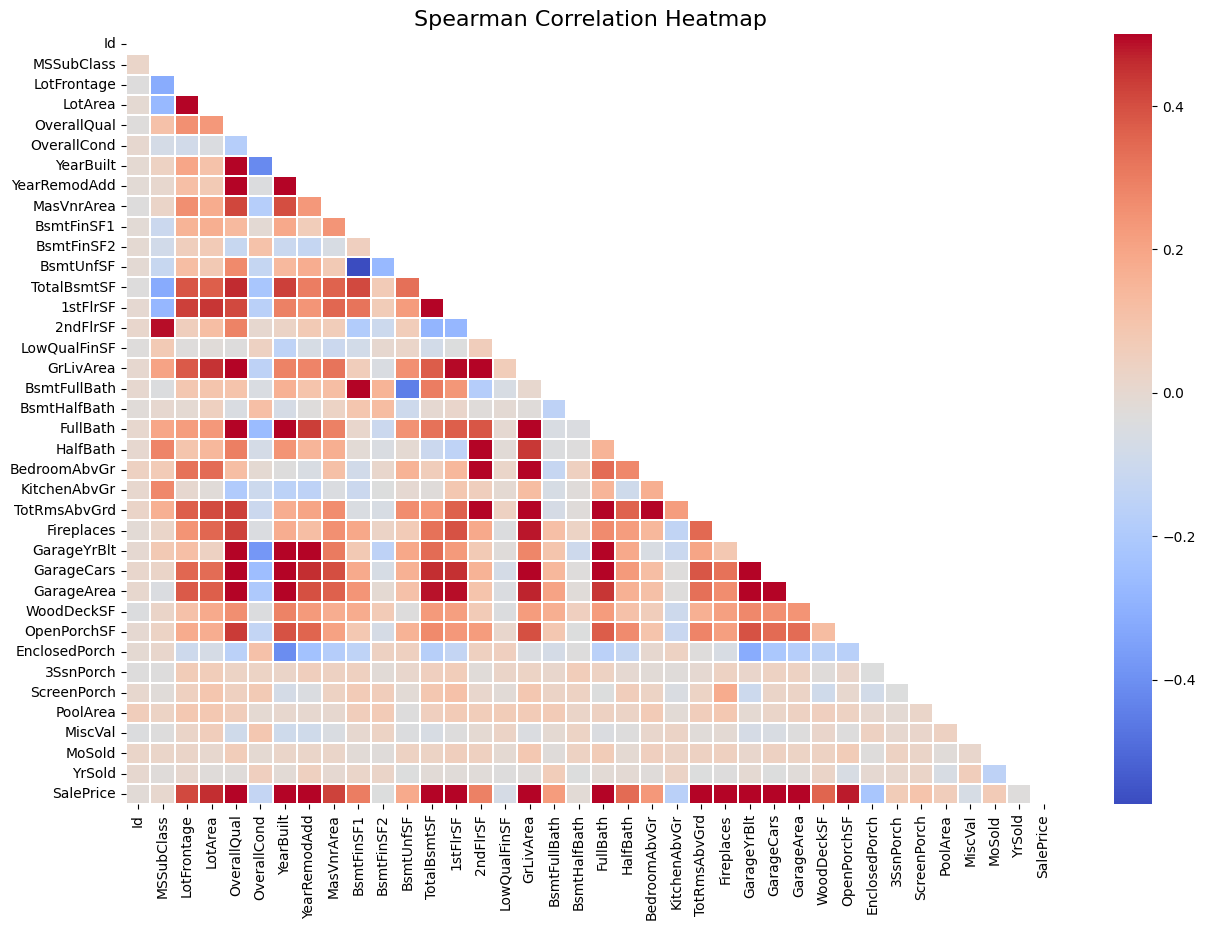

In [ ]:
corr = train.corr(method='spearman')

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,vmax=0.5, mask=mask,annot=False, fmt='.2f', linewidths=0.2,cmap="coolwarm")  # Use the "viridis" color map
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()

<ipython-input-24-e4c16d5164ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


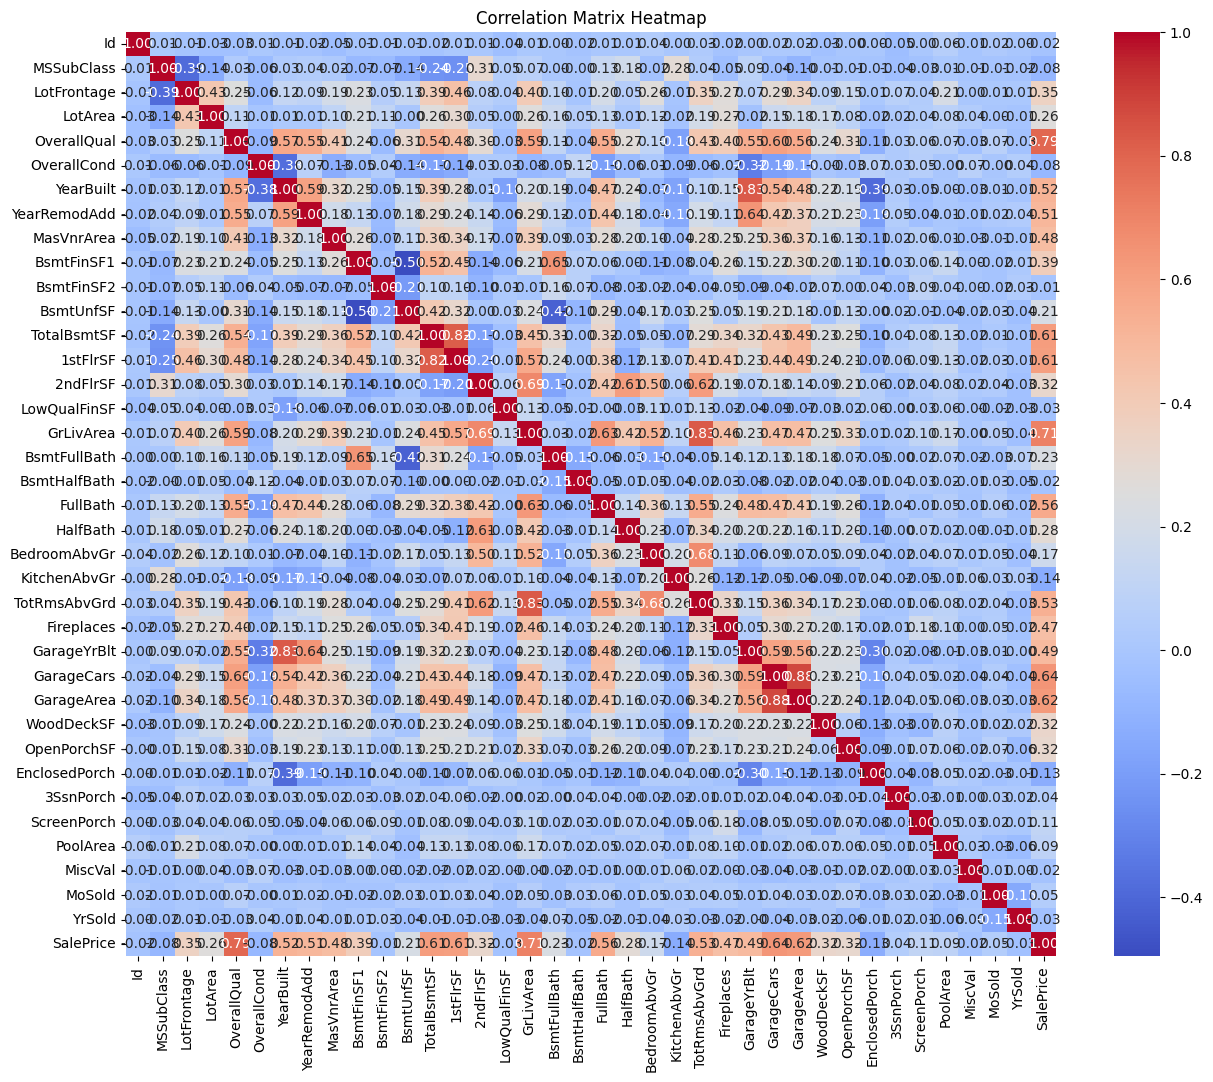

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
numeric_features = train.select_dtypes(include='number').columns.tolist()

# Calculate correlations with SalePrice
correlations = train[numeric_features].corr()['SalePrice'].abs()

max_features = correlations.nlargest(10).index.tolist()
print(max_features)

# Select the top 6 columns (including SalePrice itself)
top_features = correlations.nlargest(6).index.tolist()

# Print the selected columns
print("Top 5 columns with the highest correlation with SalePrice:")
print(top_features)  # Exclude SalePrice itself


['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
Top 5 columns with the highest correlation with SalePrice:
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


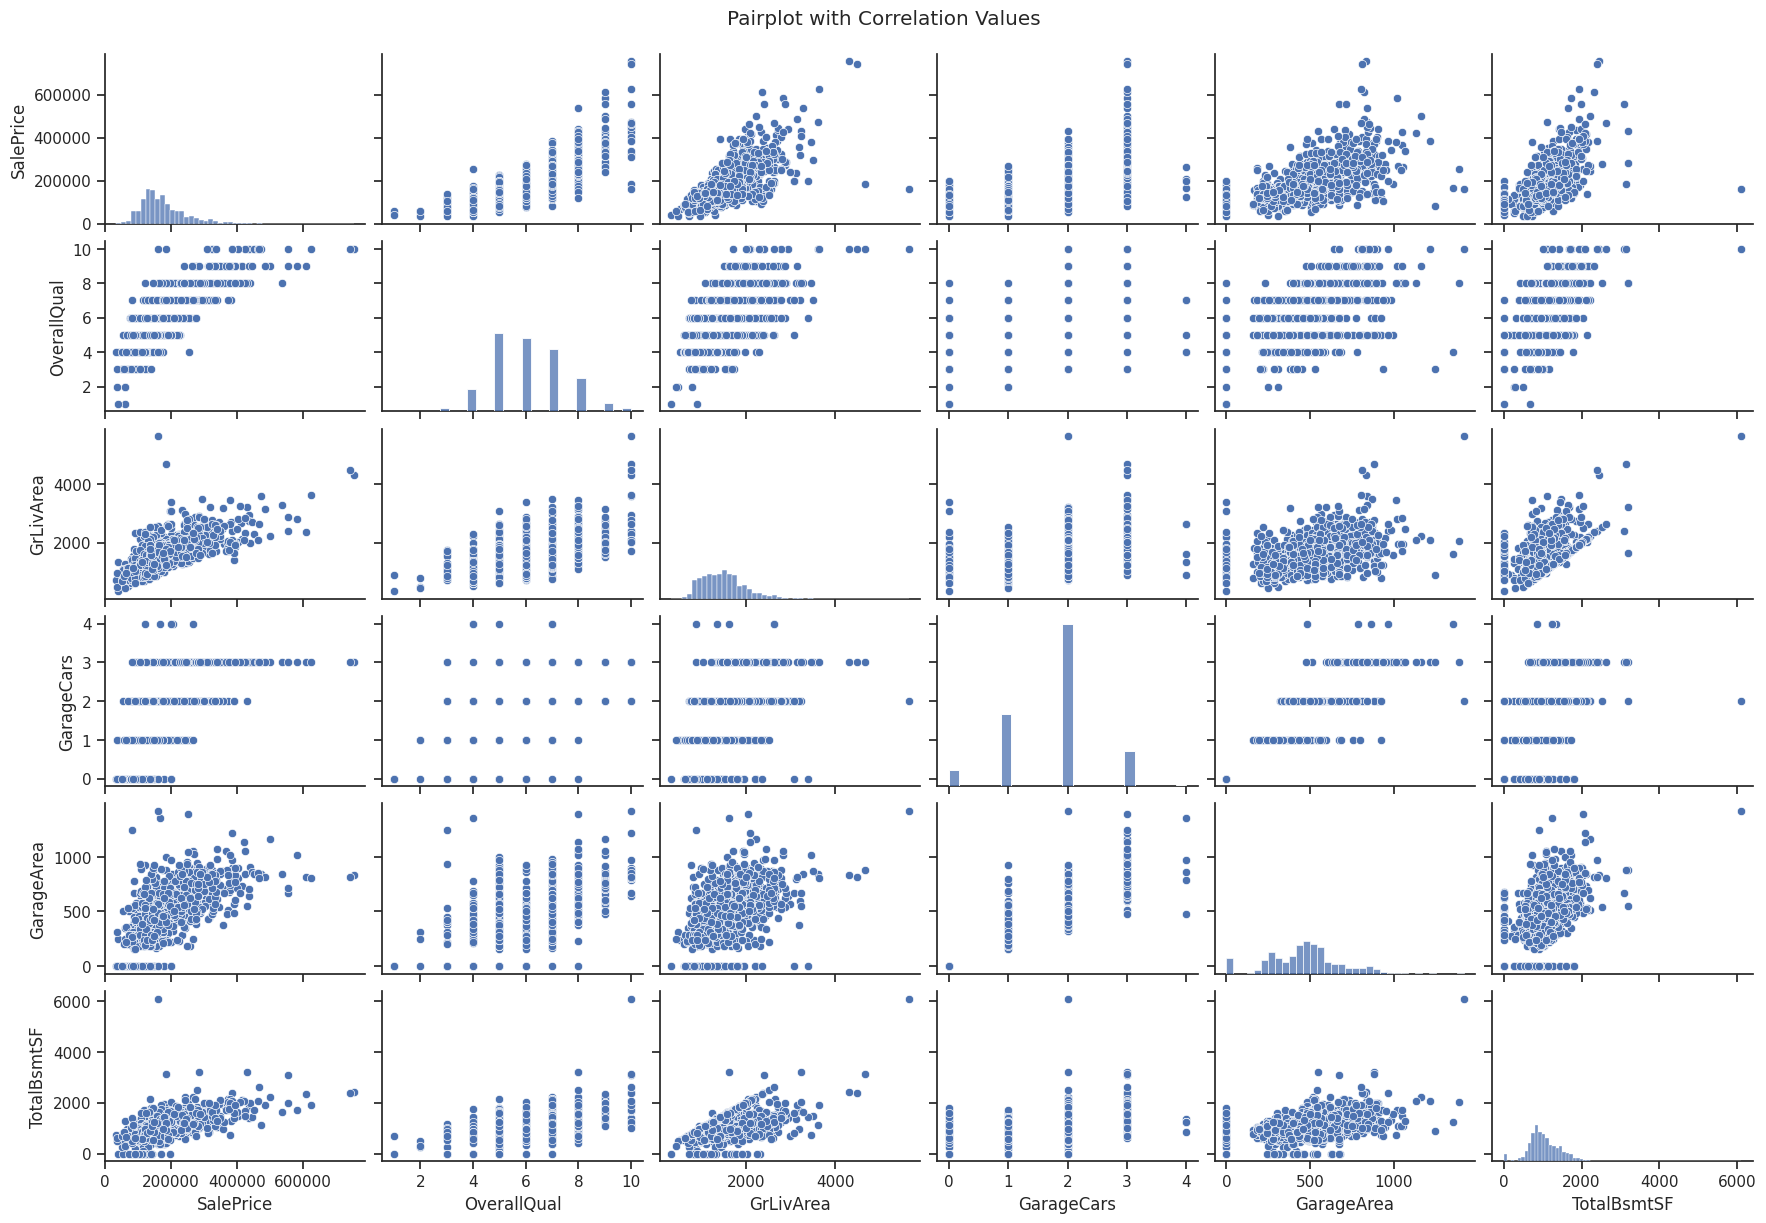

In [ ]:
# Visualize correlations using a pairplot
sns.set(style="ticks")
pairplot = sns.pairplot(train[top_features], height=2, aspect=1.5)
pairplot.fig.suptitle("Pairplot with Correlation Values", y=1.02)
plt.show()



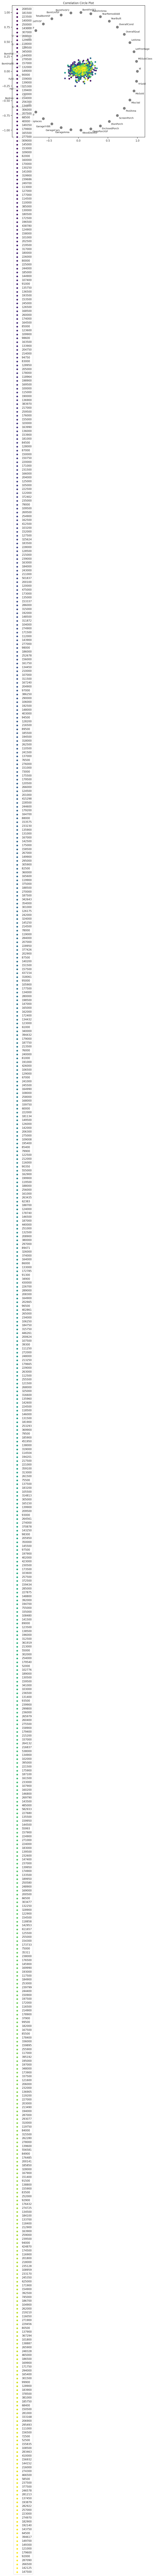

In [ ]:
# Visualize correlations using a correlation circle plot
plt.figure(figsize=(10, 10))
from pandas.plotting import radviz
radviz(train[numeric_features], class_column='SalePrice', colormap='viridis')
plt.title("Correlation Circle Plot")
plt.show()

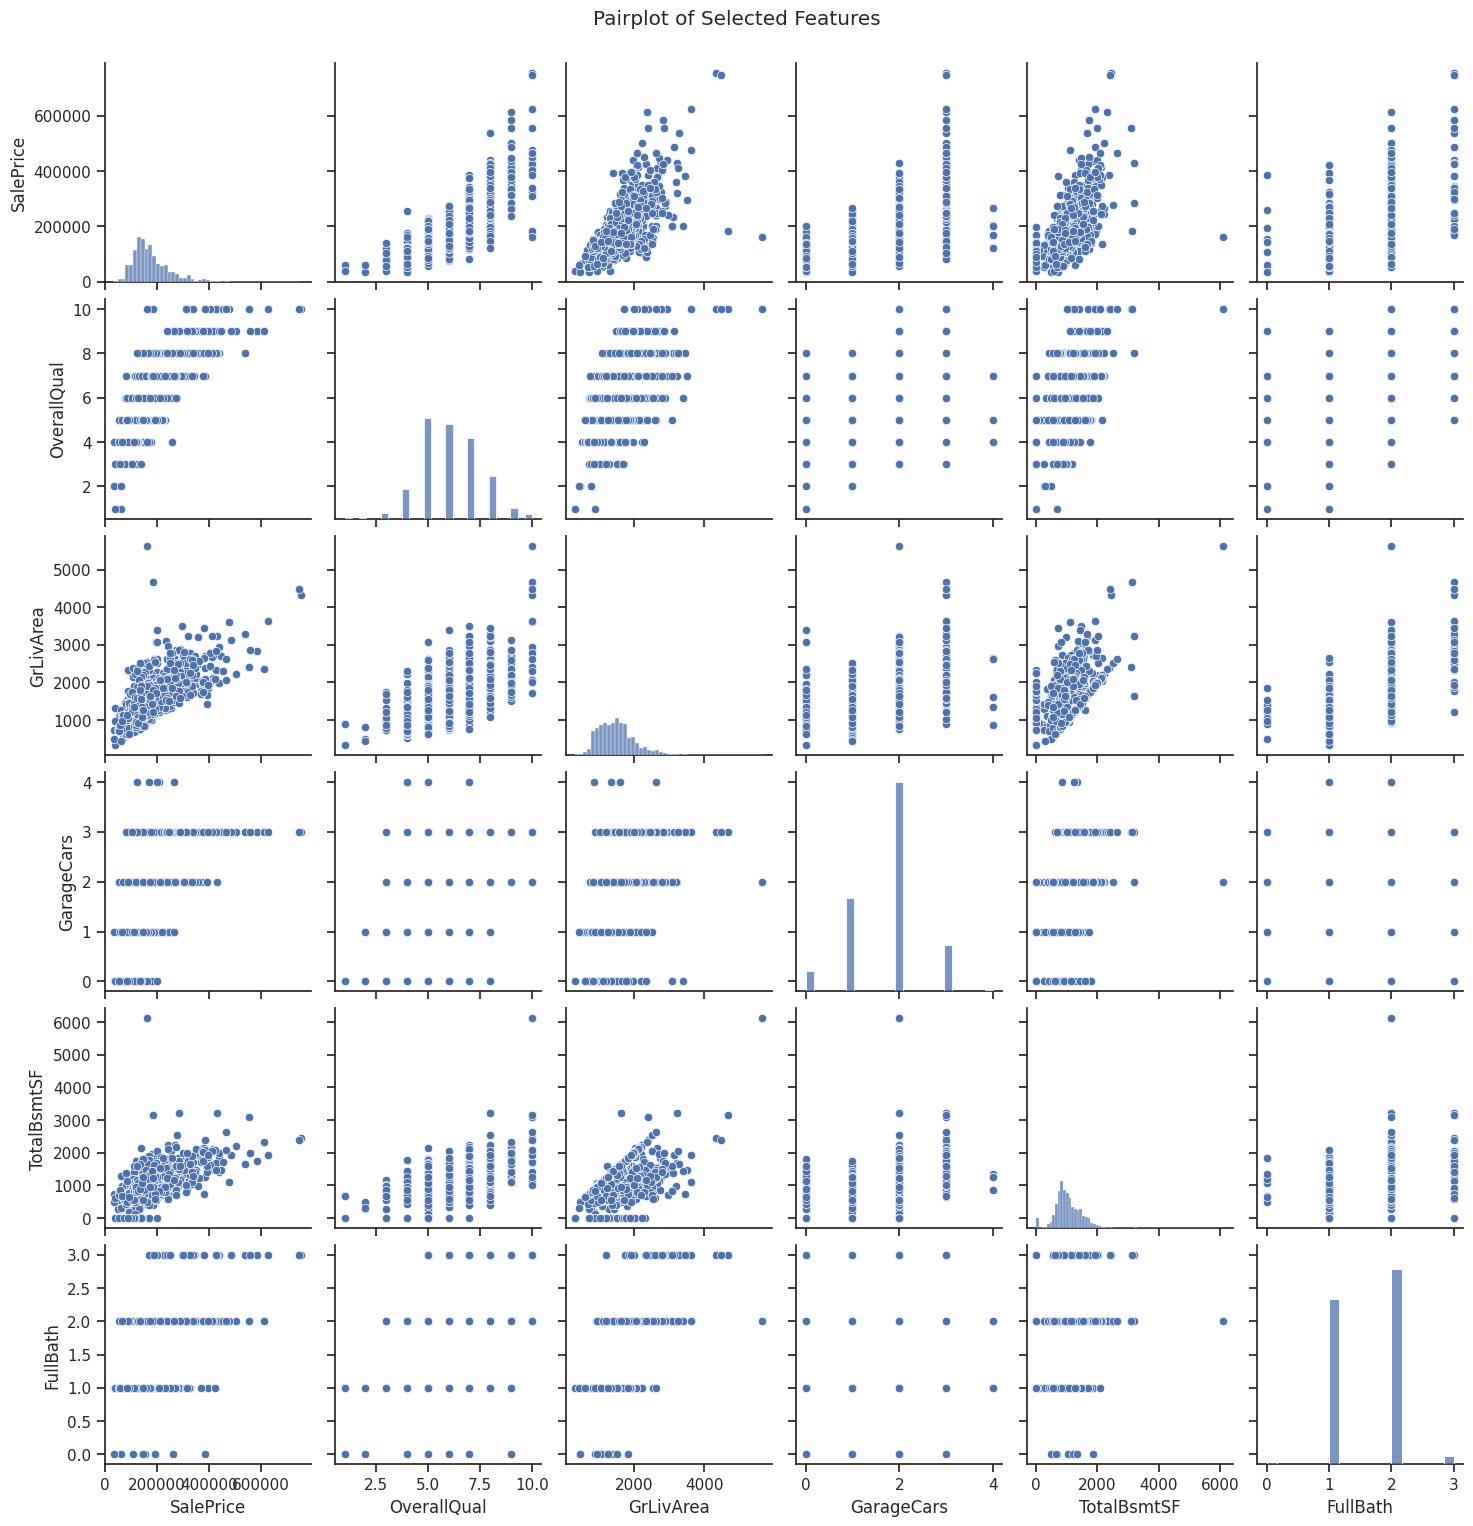

In [ ]:
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(train[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

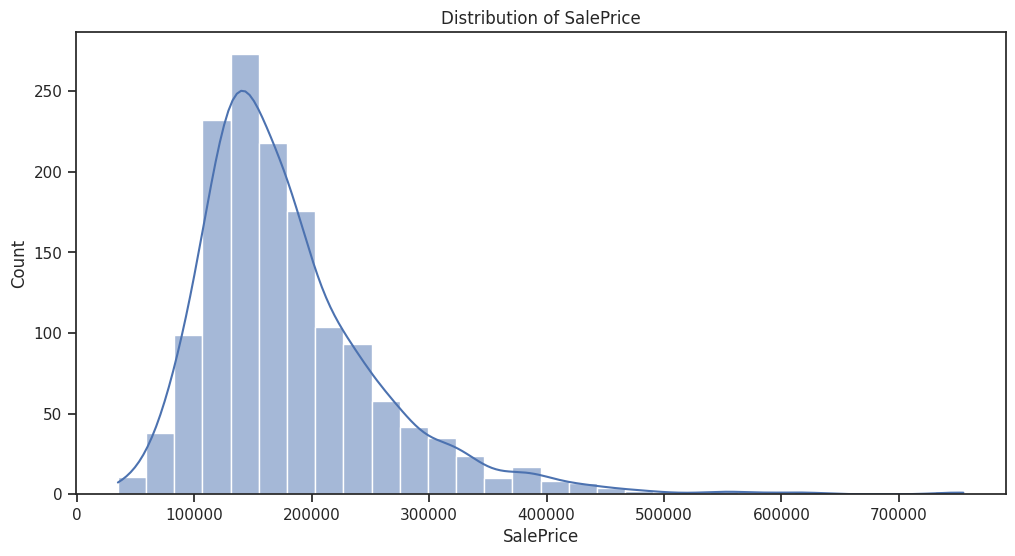

In [ ]:
# Distribution of the target variable 'SalePrice'
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

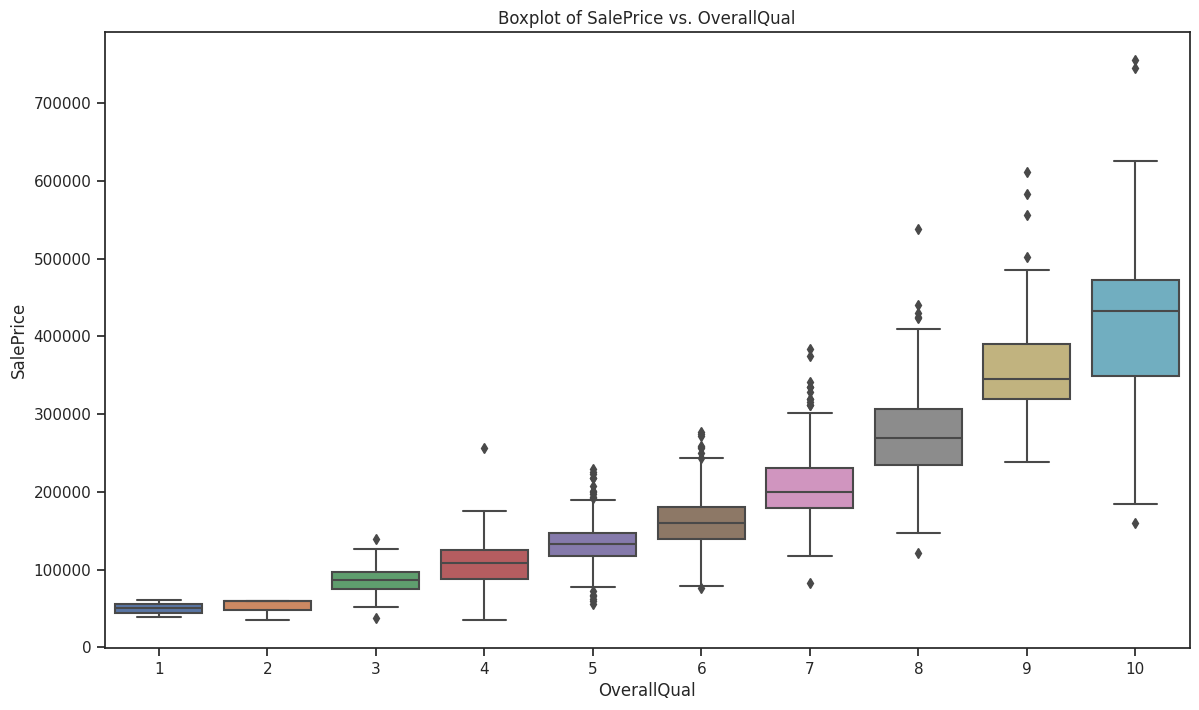

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title("Boxplot of SalePrice vs. OverallQual")
plt.show()

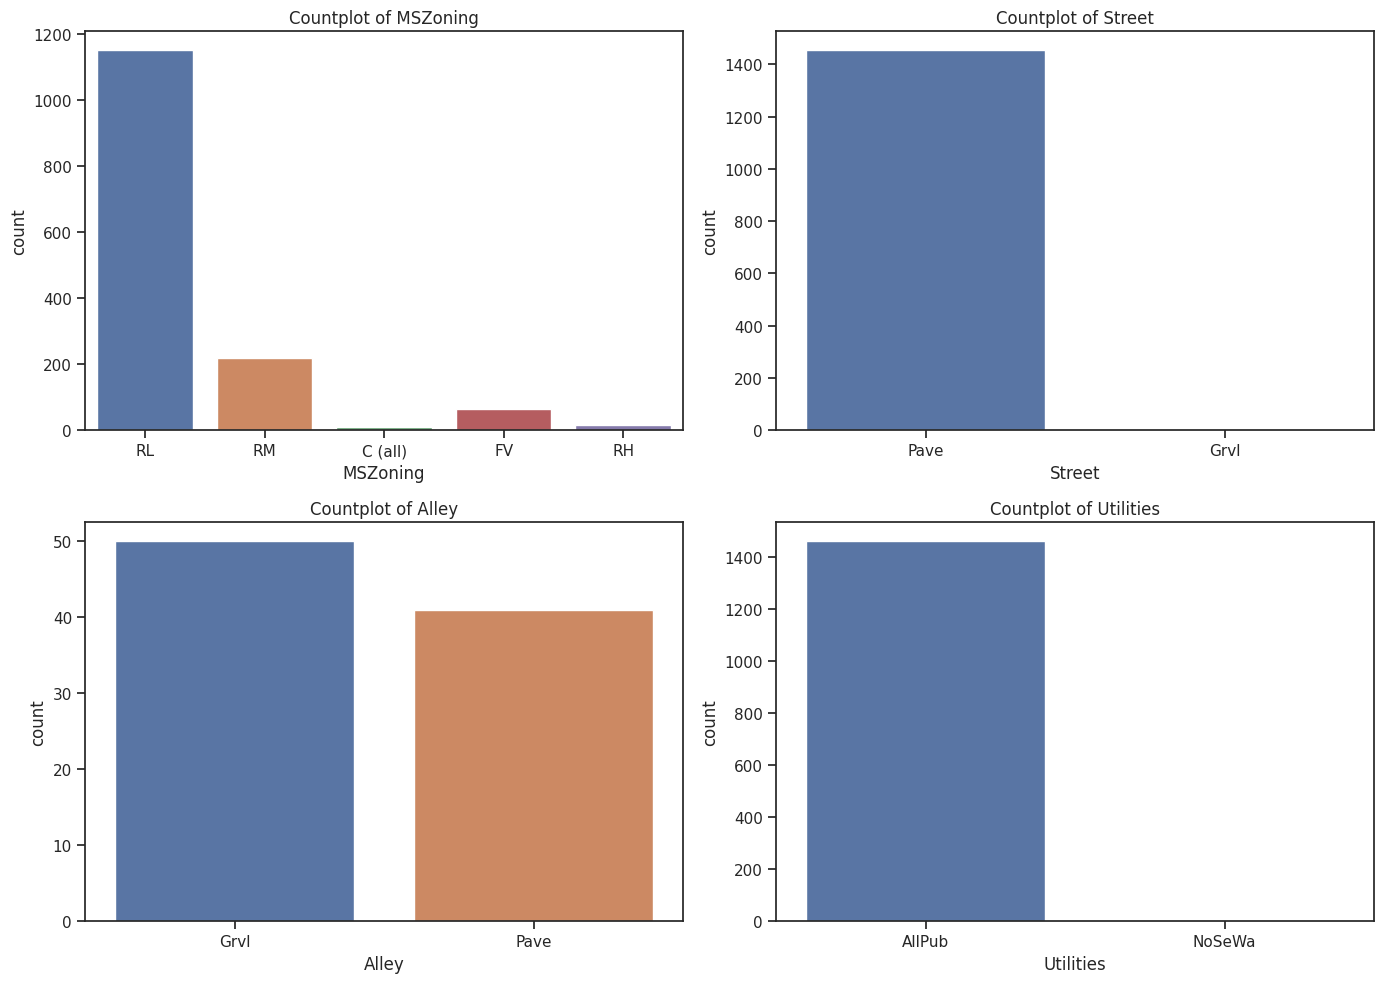

In [ ]:
categorical_variables = ['MSZoning', 'Street', 'Alley', 'Utilities']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=train, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Countplot of {variable}')
plt.tight_layout()
plt.show()

In [ ]:
train.columns.to_series().groupby(train.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [ ]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
y.shape

(1460,)

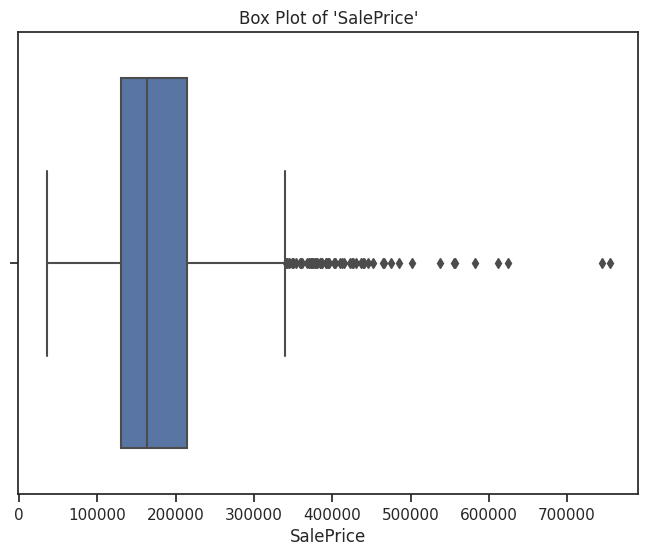

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y)
plt.title("Box Plot of 'SalePrice'")
plt.show()

#Data Cleaning

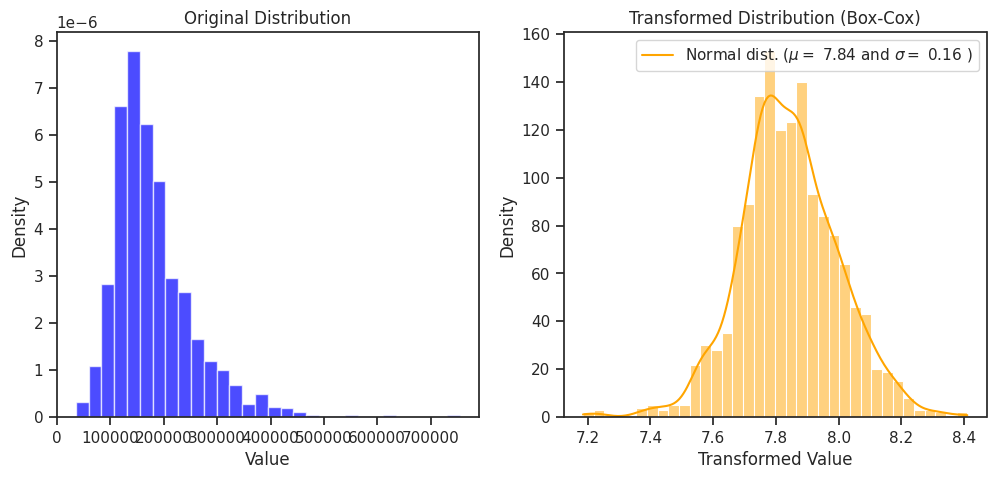

In [ ]:
from scipy.stats import boxcox, norm
from scipy.special import inv_boxcox

# Example target variable

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original distribution
axes[0].hist(y, bins=30, density=True, color='blue', alpha=0.7)
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

# Apply the Box-Cox transformation
y_tr, lambda_value = boxcox(y + 1)  # Adding 1 to handle zero values

# Plot the transformed distribution
sns.histplot(y_tr, kde=True, color='orange', ax=axes[1])
(mu, sigma) = norm.fit(y_tr)
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
               loc='best')
axes[1].set_title('Transformed Distribution (Box-Cox)')
axes[1].set_xlabel('Transformed Value')
axes[1].set_ylabel('Density')

# Show plots
plt.show()


<ipython-input-37-16f692881537>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_tr , fit=norm);


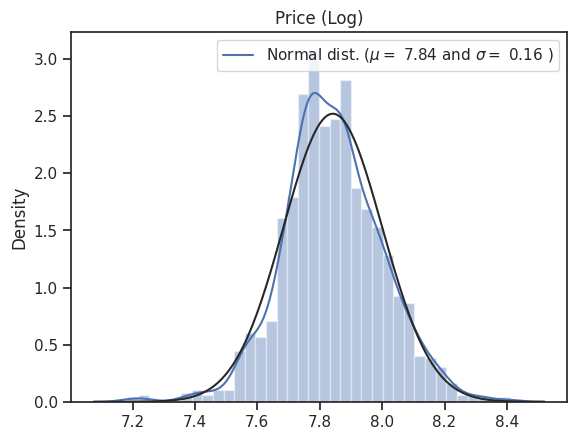

In [ ]:
sns.distplot(y_tr , fit=norm);
(mu, sigma) = norm.fit(y_tr)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Price (Log)');

In [ ]:
print(y.shape)
print(y_tr.shape)

(1460,)
(1460,)


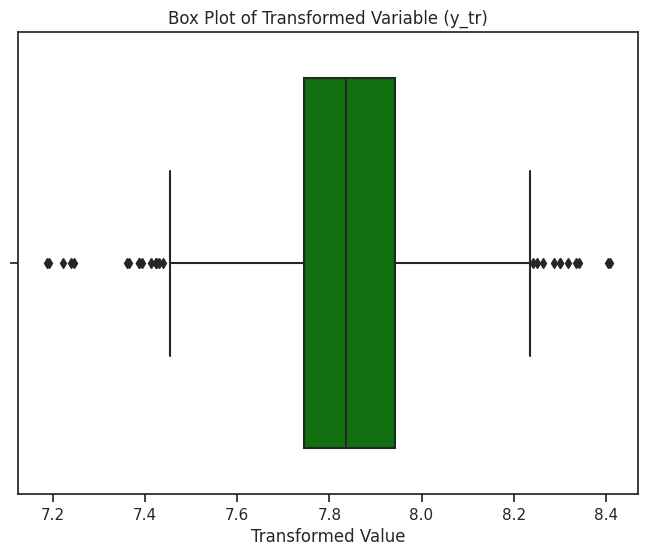

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_tr, color='green')
plt.title("Box Plot of Transformed Variable (y_tr)")
plt.xlabel("Transformed Value")
plt.show()

In [ ]:
print(y_tr[:5])
y_tr.shape

[7.93227473 7.87793334 7.95927945 7.77463545 8.00253144]


(1460,)

In [ ]:
y.shape

(1460,)

Outliers removed

In [ ]:
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Select columns with missing values greater than 15 percent
columns_with_missing = missing_percentage[missing_percentage > 15].index.tolist()

# Print the columns with missing values greater than 15 percent
print("Columns with missing values greater than 15 percent:")
print(columns_with_missing)

Columns with missing values greater than 15 percent:
['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
train.shape

(1460, 81)

In [ ]:
test.shape

(1459, 80)

In [ ]:
train_data_processed = train.copy()
test_data_processed = test.copy()

# Add a "Dataset" column to identify the source
train_data_processed["Dataset"] = "Train"
test_data_processed["Dataset"] = "Test"

# Concatenate DataFrames
joined_data = pd.concat([train_data_processed, test_data_processed], ignore_index=True)

print("Joined Dataframe shape: {}".format(joined_data.shape))

Joined Dataframe shape: (2919, 82)


In [ ]:
joined_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  Dataset  
0       WD         Normal   208500.0    Train  
1       WD         Normal   181500.0    Train  
2       WD         Normal   223500.0    Train  
3       WD        Abnorml   140000.0    Train  
4       WD         Normal   250000.0    Train  

[5 rows x 82 columns]

In [ ]:
joined_data.drop(['Id'], axis=1, inplace=True)

In [ ]:
numeric_features = list(joined_data.select_dtypes(include=[np.number]).columns.values)
categorical_features = list(joined_data.select_dtypes(include=['object']).columns.values)

# Convert numeric features to float
for col in numeric_features:
    joined_data[col] = joined_data[col].astype(float)

In [ ]:
columns_to_fill_zero = ["LotFrontage", 'GarageYrBlt', 'GarageArea', 'GarageCars']

for col in columns_to_fill_zero:
    joined_data[col].fillna(0.0, inplace=True)


In [ ]:
joined_data[categorical_features] = joined_data[categorical_features].apply(lambda x: x.fillna("None"), axis=0)

In [ ]:
joined_data[numeric_features] = joined_data[numeric_features].fillna(joined_data[numeric_features].median())

In [ ]:
# Feature engineering: added combinations of features
joined_data['YrBltAndRemod'] = joined_data['YearBuilt'] + joined_data['YearRemodAdd']
joined_data['TotalSF'] = joined_data['TotalBsmtSF'] + joined_data['1stFlrSF'] + joined_data['2ndFlrSF']
joined_data['Total_sqr_footage'] = (joined_data['BsmtFinSF1'] + joined_data['BsmtFinSF2'] +
                                joined_data['1stFlrSF'] + joined_data['2ndFlrSF'])
joined_data['Total_Bathrooms'] = (joined_data['FullBath'] + (0.5 * joined_data['HalfBath']) +
                              joined_data['BsmtFullBath'] + (0.5 * joined_data['BsmtHalfBath']))
joined_data['Total_porch_sf'] = (joined_data['OpenPorchSF'] + joined_data['3SsnPorch'] +
                             joined_data['EnclosedPorch'] + joined_data['ScreenPorch'] +
                             joined_data['WoodDeckSF'])
print("Feature engineering: added combinations of features.")

# Feature engineering: added boolean features
joined_data['haspool'] = np.where(joined_data['PoolArea'] > 0, 1, 0)
joined_data['has2ndfloor'] = np.where(joined_data['2ndFlrSF'] > 0, 1, 0)
joined_data['hasgarage'] = np.where(joined_data['GarageArea'] > 0, 1, 0)
joined_data['hasbsmt'] = np.where(joined_data['TotalBsmtSF'] > 0, 1, 0)
joined_data['hasfireplace'] = np.where(joined_data['Fireplaces'] > 0, 1, 0)

Feature engineering: added combinations of features.


In [ ]:
joined_data['MSSubClass'] = joined_data['MSSubClass'].apply(str)
joined_data['YrSold'] = joined_data['YrSold'].astype(str)
joined_data['MoSold'] = joined_data['MoSold'].astype(str)
joined_data['YrBltAndRemod'] = joined_data['YrBltAndRemod'].astype(str)

In [ ]:
numeric_features = list(joined_data.select_dtypes(include=[np.number]).columns.values)
categ_features = list(joined_data.select_dtypes(include=['object']).columns.values)

In [ ]:
joined_data = pd.get_dummies(joined_data)

In [ ]:
joined_data['Dataset_Test']

0       0
1       0
2       0
3       0
4       0
       ..
2914    1
2915    1
2916    1
2917    1
2918    1
Name: Dataset_Test, Length: 2919, dtype: uint8

In [ ]:
joined_data.shape

(2919, 522)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
joined_data[numeric_features] = scaler.fit_transform(joined_data[numeric_features])

In [ ]:
overfit = []
for i in joined_data.columns:
    counts = joined_data[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(joined_data) * 100 > 99.9: # the threshold is set at 99.9%
        overfit.append(i)
overfit = list(overfit)
# let's make sure to keep data processing columns needed later on
try:
    overfit.remove('Dataset')
except:
    pass
joined_data.drop(overfit, axis=1, inplace=True)
print("To prevent overfitting, {} columns were removed.".format(len(overfit)))
print(overfit)

To prevent overfitting, 44 columns were removed.
['MSSubClass_150.0', 'Utilities_NoSeWa', 'Utilities_None', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_None', 'Exterior1st_Stone', 'Exterior2nd_None', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'Electrical_None', 'KitchenQual_None', 'Functional_None', 'Functional_Sev', 'PoolQC_Fa', 'MiscFeature_TenC', 'SaleType_None', 'YrBltAndRemod_3830.0', 'YrBltAndRemod_3835.0', 'YrBltAndRemod_3845.0', 'YrBltAndRemod_3846.0', 'YrBltAndRemod_3851.0', 'YrBltAndRemod_3854.0', 'YrBltAndRemod_3855.0', 'YrBltAndRemod_3857.0', 'YrBltAndRemod_3859.0', 'YrBltAndRemod_3861.0', 'YrBltAndRemod_3862.0', 'YrBltAndRemod_3863.0', 'YrBltAndRemod_3867.0', 'YrBltAndRemod_3883.0', 'YrBltAndRemod_3894.0', 'YrBltAndRemod_3911.0', 'YrBltAndRemod_3939.0']


In [ ]:
missing_values = joined_data.isnull().sum().sum()

# Display columns with missing values and their counts
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
0


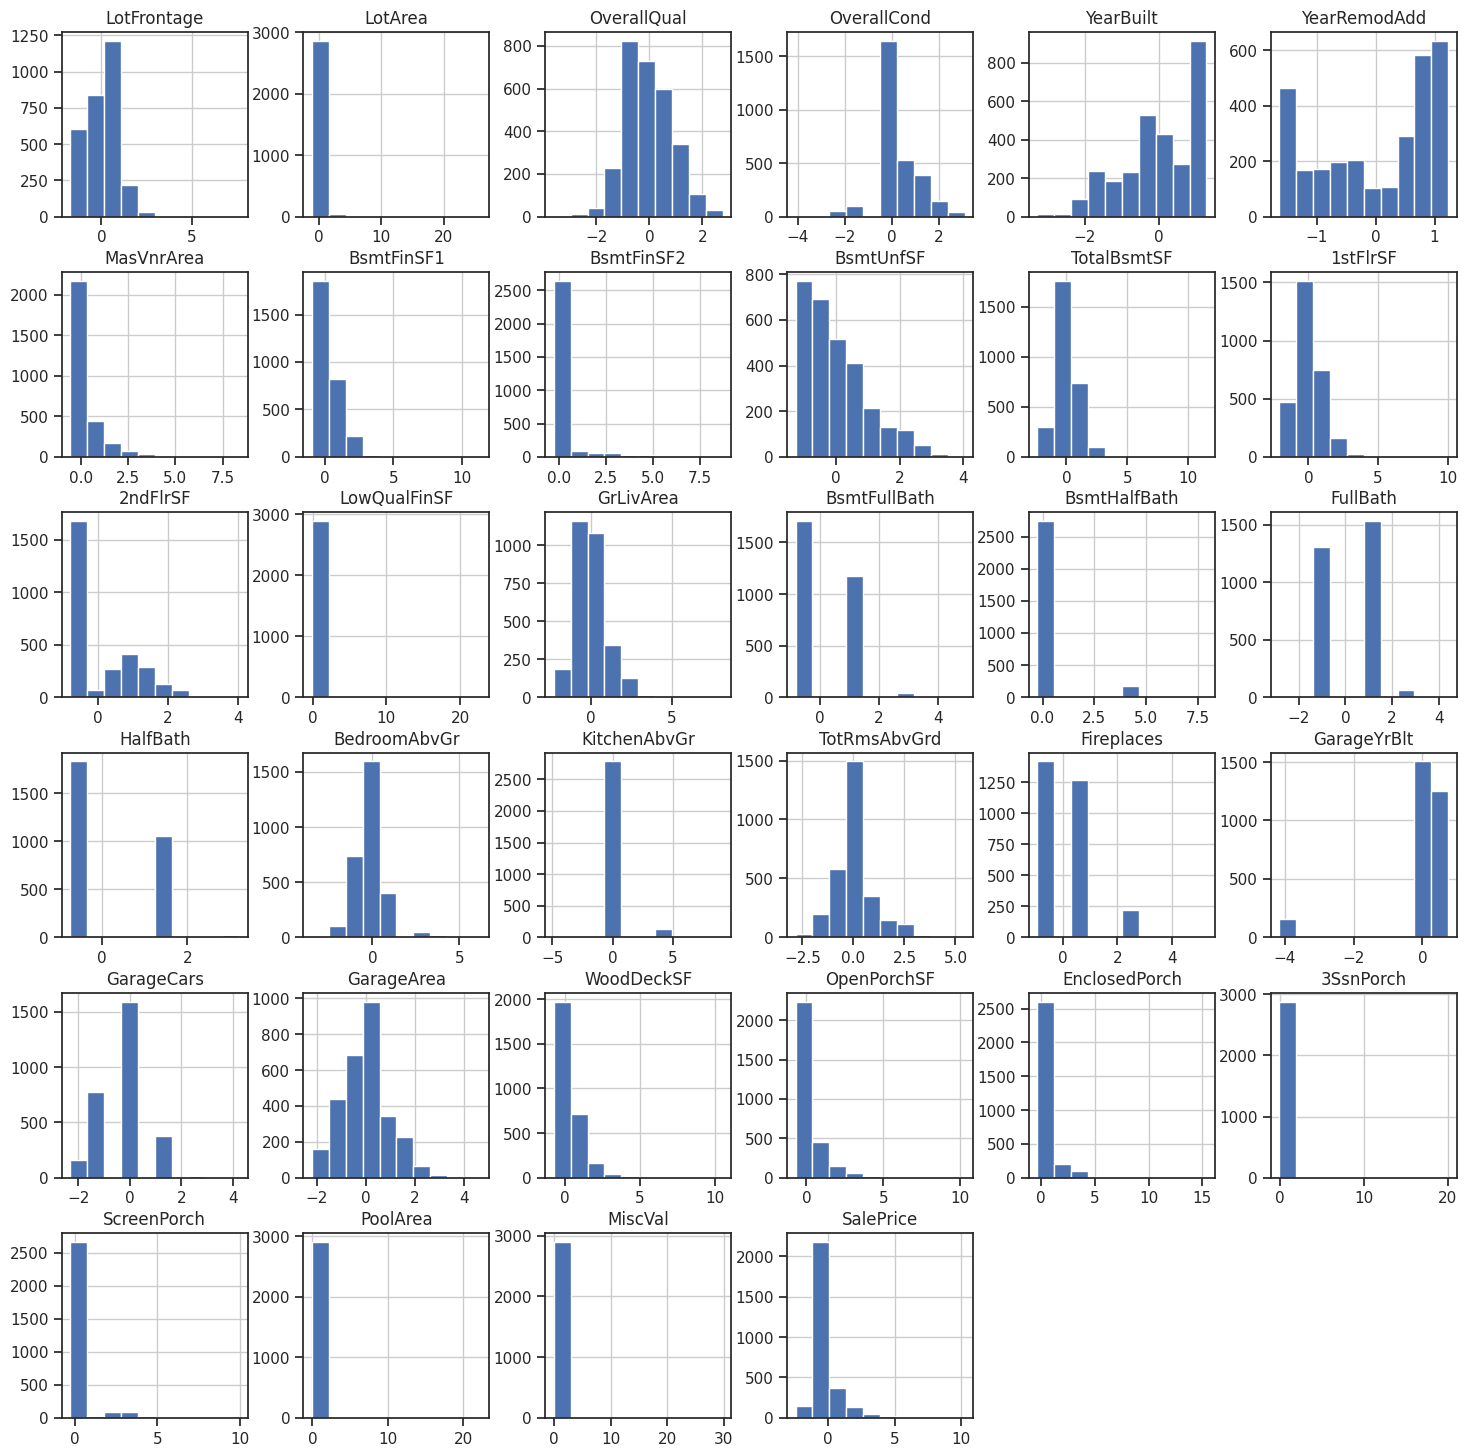

In [ ]:
cor = list(correlations.index)
df_train_scal = joined_data.filter(cor, axis=1).copy()
df_train_scal.hist(figsize=(18,18))
plt.show()

In [ ]:
joined_data.shape

(2919, 478)

In [ ]:
joined_data.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.216075 -0.217879     0.646183    -0.507284   1.046258      0.896833   
1     0.664158 -0.072044    -0.063185     2.188279   0.154764     -0.395604   
2     0.305692  0.137197     0.646183    -0.507284   0.980221      0.848965   
3     0.066714 -0.078385     0.646183    -0.507284  -1.859351     -0.682812   
4     0.783647  0.518903     1.355551    -0.507284   0.947203      0.753229   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  YrBltAndRemod_4011.0  \
0    0.529034    0.580959   -0.293025  -0.934782  ...                     0   
1   -0.567016    1.178162   -0.293025  -0.629818  ...                     0   
2    0.338903    0.097928   -0.293025  -0.288441  ...                     0   
3   -0.567016   -0.494884   -0.293025  -0.047201  ...                     0   
4    1.390216    0.468984   -0.293025  -0.160994  ...                     0   

   YrBltAndRemod_4012.0  YrBltAndRemod_4013.0  YrBltAndRemod_4014.0  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   YrBltAndRemod_4015.0  YrBltAndRemod_4016.0  YrBltAndRemod_4017.0  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   YrBltAndRemod_4018.0  YrBltAndRemod_4019.0  YrBltAndRemod_4020.0  
0                     0                     0                     0  
1                     0                     0                     0  
2                     0                     0                     0  
3                     0                     0                     0  
4                     0                     0                     0  

[5 rows x 478 columns]

In [ ]:
matching_columns = [col for col in joined_data.columns if "Dataset" in col]
print(matching_columns)

['Dataset_Test', 'Dataset_Train']


In [ ]:
joined_data['Dataset_Test']

0       0
1       0
2       0
3       0
4       0
       ..
2914    1
2915    1
2916    1
2917    1
2918    1
Name: Dataset_Test, Length: 2919, dtype: uint8

In [ ]:
print(joined_data['Dataset_Train'])

0       1
1       1
2       1
3       1
4       1
       ..
2914    0
2915    0
2916    0
2917    0
2918    0
Name: Dataset_Train, Length: 2919, dtype: uint8


In [ ]:
# Extract Training data from joined transformed dataset
train_ml = joined_data[joined_data['Dataset_Train'] == 1].copy()
# Remove redundant features
train_ml.drop(['Dataset_Train'], axis=1, inplace=True)
train_ml.drop(['Dataset_Test'], axis=1, inplace=True)
# Reset index
train_ml = train_ml.reset_index(drop=True)
print(train_ml.shape)

(1460, 476)


In [ ]:
# Extract Testing data from joined transformed dataset
test_ml = joined_data[joined_data['Dataset_Test']==1].copy()
# Remove redundant features
test_ml.drop(['Dataset_Train'], axis=1, inplace=True)
test_ml.drop(['Dataset_Test'], axis=1, inplace=True)
# Reset index
test_ml = test_ml.reset_index(drop=True)
print(test_ml.shape)

(1459, 476)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ml,y_tr,test_size=0.3,stratify=train_ml[['OverallQual']],random_state=42)

In [ ]:
X_train.shape

(1022, 476)

In [ ]:
X_test.shape

(438, 476)

In [ ]:
y_train.shape

(1022,)

In [ ]:
y_test.shape

(438,)

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
ml_mod = []
ml_mod.append(('Ridge Regression', Ridge(alpha=0.5)))
ml_mod.append(('Lasso', Lasso(alpha=0.01, max_iter=1000, random_state=42)))
ml_mod.append(('ElasticNet', ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=1000)))
ml_mod.append(('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)))
ml_mod.append(('XGBoost Regressor', XGBRegressor(objective='reg:squarederror', learning_rate=0.1, n_estimators=100, random_state=42)))
ml_mod.append(('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)))
ml_mod.append(('LGBM Regressor', LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)))
ml_mod.append(('SVR', SVR(kernel='linear', C=1.0)))
ml_mod.append(('KNeighbors Regressor', KNeighborsRegressor(n_neighbors=5)))
ml_mod.append(('Decision Tree Regressor', DecisionTreeRegressor(max_depth=5, random_state=42)))

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
rmse_scores = []


In [ ]:
adjusted_r2_scores=[]

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

In [ ]:
for n, mod in ml_mod:
    # Calculate RMSE using cross-validation
    rmse = np.sqrt(-cross_val_score(mod, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold))
    rmse_scores.append((n, rmse.mean()))

    # Calculate R-squared using cross-validation
    r2 = cross_val_score(mod, X_train, y_train, scoring='r2', cv=kfold)
    adjusted_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    adjusted_r2_scores.append((n, adjusted_r2.mean()))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3873
[LightGBM] [Info] Number of data points in the train set: 817, number of used features: 204
[LightGBM] [Info] Start training from score 7.837133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
rmse_scores

[('Ridge Regression', 0.045029710251045636),
 ('Lasso', 0.04815046444702582),
 ('ElasticNet', 0.04388021520682251),
 ('Random Forest', 0.00771574492102266),
 ('XGBoost Regressor', 0.007355270998915265),
 ('Gradient Boosting Regressor', 0.003860205686417988),
 ('LGBM Regressor', 0.020950006854184012),
 ('SVR', 0.05879678673366705),
 ('KNeighbors Regressor', 0.06610817282722112),
 ('Decision Tree Regressor', 0.01200186587053018)]

In [ ]:
adjusted_r2_scores

[('Ridge Regression', 0.8488684678102016),
 ('Lasso', 0.8259163965458718),
 ('ElasticNet', 0.8557590786166609),
 ('Random Forest', 0.9948799486105541),
 ('XGBoost Regressor', 0.9956942993221972),
 ('Gradient Boosting Regressor', 0.9986851992702638),
 ('LGBM Regressor', 0.9657521536698166),
 ('SVR', 0.7431595873878154),
 ('KNeighbors Regressor', 0.6755433196686053),
 ('Decision Tree Regressor', 0.9888118145223469)]

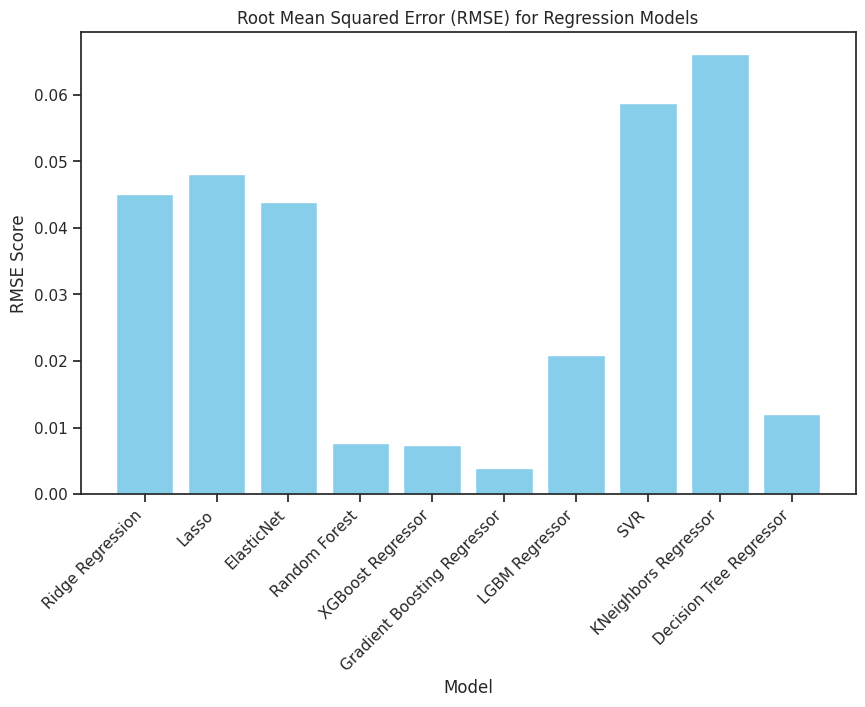

In [ ]:
# Visualize RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(*zip(*rmse_scores), color='skyblue')
plt.title('Root Mean Squared Error (RMSE) for Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45, ha='right')
plt.show()


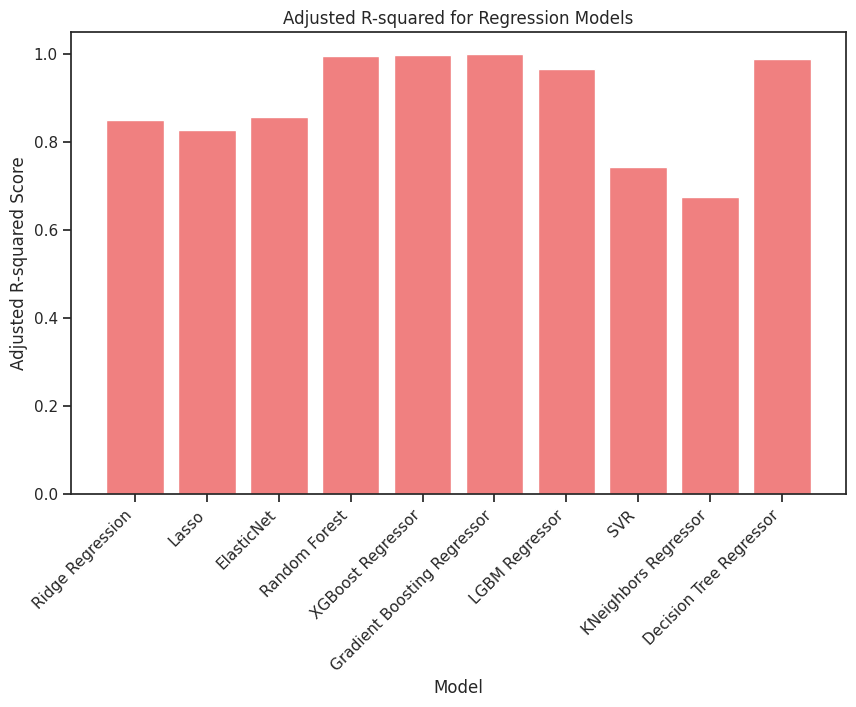

In [ ]:
# Visualize Adjusted R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(*zip(*adjusted_r2_scores), color='lightcoral')
plt.title('Adjusted R-squared for Regression Models')
plt.xlabel('Model')
plt.ylabel('Adjusted R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()

#Ensemble Learning

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
# Specify the meta-regressor (Gradient Boosting)
meta_regressor = GradientBoostingRegressor()

# Create the StackingCVRegressor
huzaifa = StackingCVRegressor(
    regressors=[model for _, model in ml_mod],
    meta_regressor=meta_regressor,
    use_features_in_secondary=False,
    random_state=42  # You can set the random state for reproducibility
)

In [ ]:
from time import time


In [ ]:
# List of models for fitting
models_to_fit = [model for _, model in ml_mod] + [huzaifa]

print('Fitting models to the training data:')
start = time()  # Get start time

# Fit each model
for model in models_to_fit:
    model_name = model.__class__.__name__  # Get the class name as the model name
    print(f'Fitting {model_name}....')
    model.fit(X_train, y_train)

end = time()  # Get end time
fitting_time = (end - start) / 60  # Calculate fitting time
print(f'Fitting completed.\nIt took {fitting_time:.2f} minutes to fit all the models to the training data.')


Fitting models to the training data:
Fitting Ridge....
Fitting Lasso....
Fitting ElasticNet....
Fitting RandomForestRegressor....
Fitting XGBRegressor....
Fitting GradientBoostingRegressor....
Fitting LGBMRegressor....
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 222
[LightGBM] [Info] Start training from score 7.840081
Fitting SVR....
Fitting KNeighborsRegressor....
Fitting DecisionTreeRegressor....
Fitting StackingCVRegressor....
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-

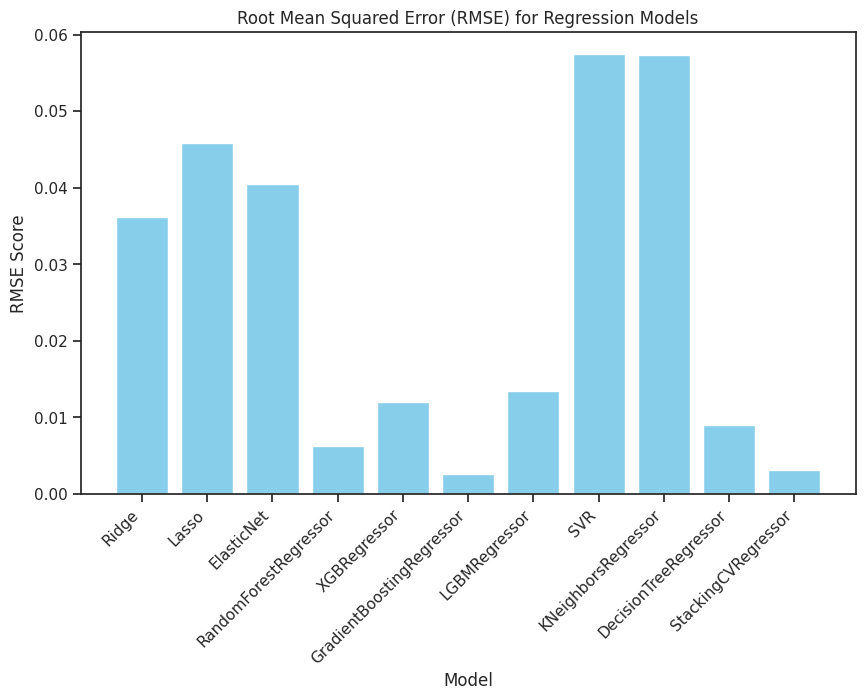

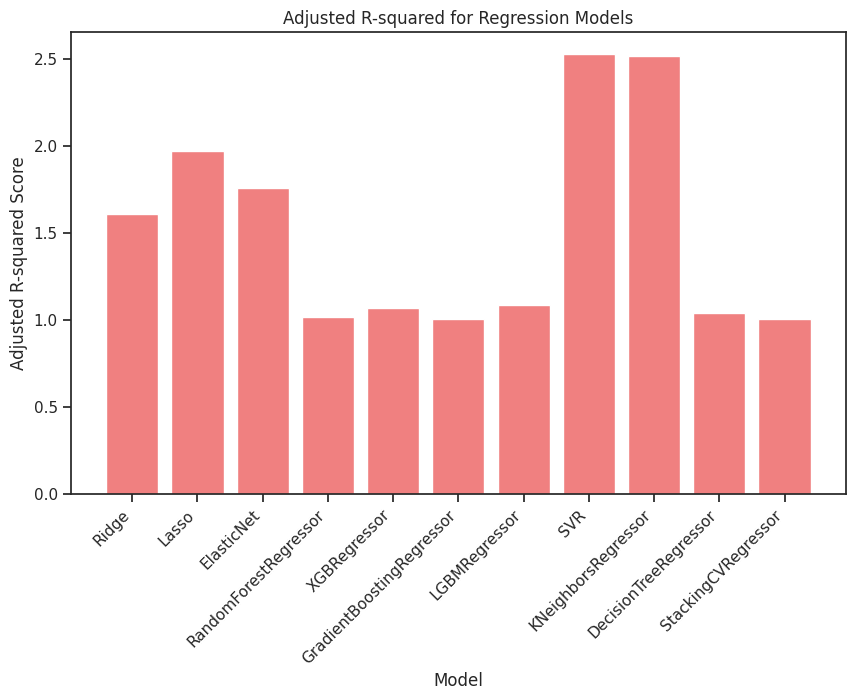

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Lists to store evaluation metrics
rmse_scores = []
adjusted_r2_scores = []
further = []
predictions = []

# Generate predictions for each model on the test data
for model in models_to_fit:
    y_pred = model.predict(X_test)
    predictions.append((model, y_pred))

# Evaluate the performance of each model
for model, y_pred in predictions:
    model_name = model.__class__.__name__

    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append((model_name, rmse))
    further.append((model,rmse))
    # Calculate R-squared and Adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    adjusted_r2_scores.append((model_name, adjusted_r2))

# Visualize RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(*zip(*rmse_scores), color='skyblue')
plt.title('Root Mean Squared Error (RMSE) for Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize Adjusted R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(*zip(*adjusted_r2_scores), color='lightcoral')
plt.title('Adjusted R-squared for Regression Models')
plt.xlabel('Model')
plt.ylabel('Adjusted R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()


#Creating the final model

[('GradientBoostingRegressor', 0.002633206499109768), ('StackingCVRegressor', 0.0031006501904526137), ('RandomForestRegressor', 0.006238139263432599), ('DecisionTreeRegressor', 0.008995144510042042), ('XGBRegressor', 0.012016549616350482), ('LGBMRegressor', 0.013492579840735692), ('Ridge', 0.036182831126063734), ('ElasticNet', 0.04052704166899221), ('Lasso', 0.04580808209172261), ('KNeighborsRegressor', 0.05728488288213044), ('SVR', 0.0574497096344888)]


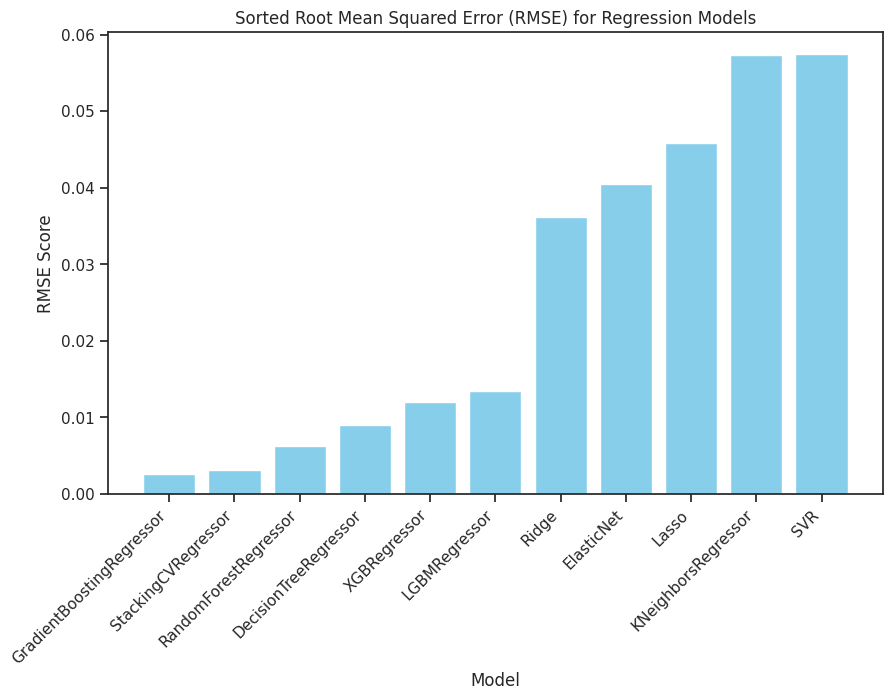

In [ ]:
# Sort rmse_scores by the second element (RMSE)
sorted_rmse_scores = sorted(rmse_scores, key=lambda x: x[1])
sorted_further = sorted(further, key=lambda x: x[1])
print(sorted_rmse_scores)
# Visualize the sorted RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(*zip(*sorted_rmse_scores), color='skyblue')
plt.title('Sorted Root Mean Squared Error (RMSE) for Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
def final_model(X_test):
    t_sum = sum(w for m,w in further)
    return sum(((1-w)/t_sum * model.predict(X_test) for model, w in further))

In [ ]:
final_y_=final_model(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-

In [ ]:
X_test.shape

(438, 476)

In [ ]:
final_y_.shape

(438,)